1) Value-based methods with linear function approximation [40 points]
Implement Q-learning and Exptected SARSA for both MountainCar-v0 1
and CartPole-v12
environments from the Gym suite using the following guidelines:

1https://gymnasium.farama.org/environments/classic_control/mountain_car/
2https://gymnasium.farama.org/environments/classic_control/cart_pole/


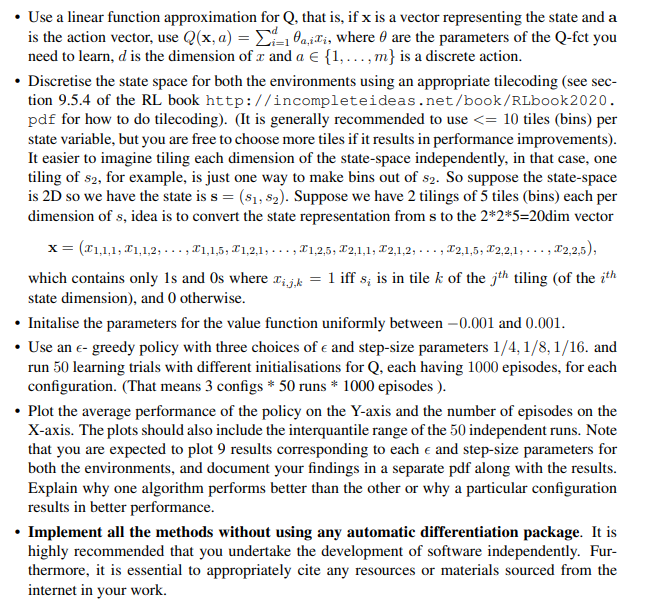

Q-Learning for Mountain Car

In [ ]:
!pip install gym

In [122]:
import numpy as np
import gym
import matplotlib.pyplot as plt

class TileCoder:
    def __init__(self, num_tilings, tiles_per_dim, env):
        self.num_tilings = num_tilings
        self.tiles_per_dim = tiles_per_dim
        self.env = env


        self.max_size = num_tilings * (self.tiles_per_dim ** len(env.observation_space.high))


        self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)

        self.offsets = [(i / num_tilings) for i in range(num_tilings)]

    def get_features(self, state):
        features = []
        for tiling in range(self.num_tilings):
            offset_state = state + self.offsets[tiling]
            scaled_state = self.scaling * offset_state
            indices = np.floor(scaled_state).astype(int) % self.tiles_per_dim
            index = np.ravel_multi_index(indices, [self.tiles_per_dim] * len(state))
            index += tiling * (self.tiles_per_dim ** len(state))
            features.append(index)
        return features

class QLearningAgent:
    def __init__(self, tile_coder, alpha, gamma, num_actions):
        self.tile_coder = tile_coder
        self.alpha = alpha
        self.gamma = gamma
        self.num_actions = num_actions
        #self.theta = np.zeros((tile_coder.max_size, num_actions))
        self.theta = np.random.uniform(-0.001, 0.001, (tile_coder.max_size, num_actions))

    def select_action(self, state, epsilon):
        features = self.tile_coder.get_features(state)
        q_values = self.theta[features].mean(axis=0)
        if np.random.rand() < epsilon:
            return np.random.choice(self.num_actions)
        else:
            return np.argmax(q_values)

    def update(self, state, action, reward, next_state, done):

        features = self.tile_coder.get_features(state)
        next_features = self.tile_coder.get_features(next_state)
        q_values = self.theta[features, action].mean()
        q_values_next = self.theta[next_features].max(axis=1)
        target = reward if done else reward + self.gamma * np.mean(q_values_next)
        self.theta[features, action] += self.alpha * (target - q_values) / len(features)

env = gym.make('MountainCar-v0')
num_tilings = 8
max_size = 2048
num_actions = env.action_space.n
gamma = 1.0
tiles_per_dim = 8

#alphas = [1/4, 1/8, 1/16]
#epsilons = [0.1, 0.01, 0.001]
num_trials = 50
num_episodes = 1000




In [123]:
def train_agent(env, num_episodes, num_trials, alpha, epsilon):
    trial_rewards = np.zeros((num_trials, num_episodes))

    for trial in range(num_trials):
        tile_coder = TileCoder(num_tilings, tiles_per_dim, env)
        agent = QLearningAgent(tile_coder, alpha, gamma, num_actions)

        for episode in range(num_episodes):
            state = env.reset()
            total_reward = 0
            done = False
            while not done:
                action = agent.select_action(state, epsilon)
                next_state, reward, done, _ = env.step(action)
                agent.update(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward
            trial_rewards[trial, episode] = total_reward

        average_reward = np.mean(trial_rewards[trial])
        print(f"Trial {trial + 1}/{num_trials}: Average Reward = {average_reward}")

    return trial_rewards


In [124]:
def plot_single_configuration(rewards, alpha, epsilon):
    avg_rewards = np.mean(rewards, axis=0)

    lower_quantile = np.quantile(rewards, 0.25, axis=0)
    upper_quantile = np.quantile(rewards, 0.75, axis=0)

    episodes = np.arange(1, len(avg_rewards) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(episodes, avg_rewards, label=f'Average Reward, α={alpha}, ε={epsilon}')
    plt.fill_between(episodes, lower_quantile, upper_quantile, color='gray', alpha=0.2,
                     label='Interquantile Range (25th-75th percentile)')
    plt.title(f'Learning Curve for α={alpha}, ε={epsilon}')
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Trial 1/50: Average Reward = -184.845
Trial 2/50: Average Reward = -186.598
Trial 3/50: Average Reward = -186.008
Trial 4/50: Average Reward = -185.722
Trial 5/50: Average Reward = -186.48
Trial 6/50: Average Reward = -184.757
Trial 7/50: Average Reward = -185.023
Trial 8/50: Average Reward = -186.279
Trial 9/50: Average Reward = -185.307
Trial 10/50: Average Reward = -185.482
Trial 11/50: Average Reward = -185.329
Trial 12/50: Average Reward = -185.185
Trial 13/50: Average Reward = -184.797
Trial 14/50: Average Reward = -184.838
Trial 15/50: Average Reward = -185.047
Trial 16/50: Average Reward = -185.588
Trial 17/50: Average Reward = -184.344
Trial 18/50: Average Reward = -184.705
Trial 19/50: Average Reward = -187.005
Trial 20/50: Average Reward = -184.192
Trial 21/50: Average Reward = -184.644
Trial 22/50: Average Reward = -185.419
Trial 23/50: Average Reward = -185.713
Trial 24/50: Average Reward = -184.631
Trial 25/50: Average Reward = -185.447
Trial 26/50: Average Reward = -185.

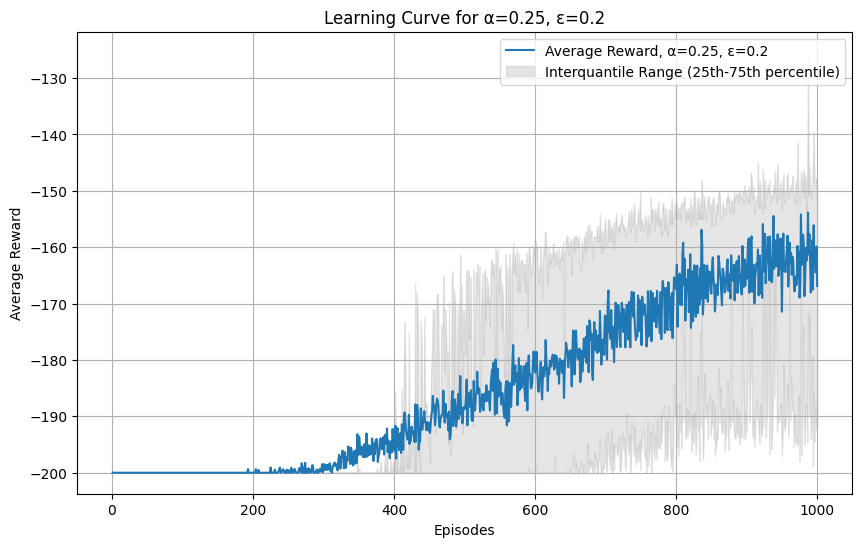

In [ ]:
alpha = 1/4
epsilon = .2

rewards1 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards1, alpha, epsilon)

Trial 1/50: Average Reward = -182.679
Trial 2/50: Average Reward = -182.754
Trial 3/50: Average Reward = -183.096
Trial 4/50: Average Reward = -182.449
Trial 5/50: Average Reward = -182.691
Trial 6/50: Average Reward = -184.525
Trial 7/50: Average Reward = -181.826
Trial 8/50: Average Reward = -182.171
Trial 9/50: Average Reward = -183.471
Trial 10/50: Average Reward = -182.557
Trial 11/50: Average Reward = -182.568
Trial 12/50: Average Reward = -182.665
Trial 13/50: Average Reward = -183.724
Trial 14/50: Average Reward = -182.36
Trial 15/50: Average Reward = -183.96
Trial 16/50: Average Reward = -183.09
Trial 17/50: Average Reward = -183.055
Trial 18/50: Average Reward = -183.281
Trial 19/50: Average Reward = -182.377
Trial 20/50: Average Reward = -182.446
Trial 21/50: Average Reward = -184.233
Trial 22/50: Average Reward = -183.664
Trial 23/50: Average Reward = -183.543
Trial 24/50: Average Reward = -182.935
Trial 25/50: Average Reward = -183.559
Trial 26/50: Average Reward = -183.37

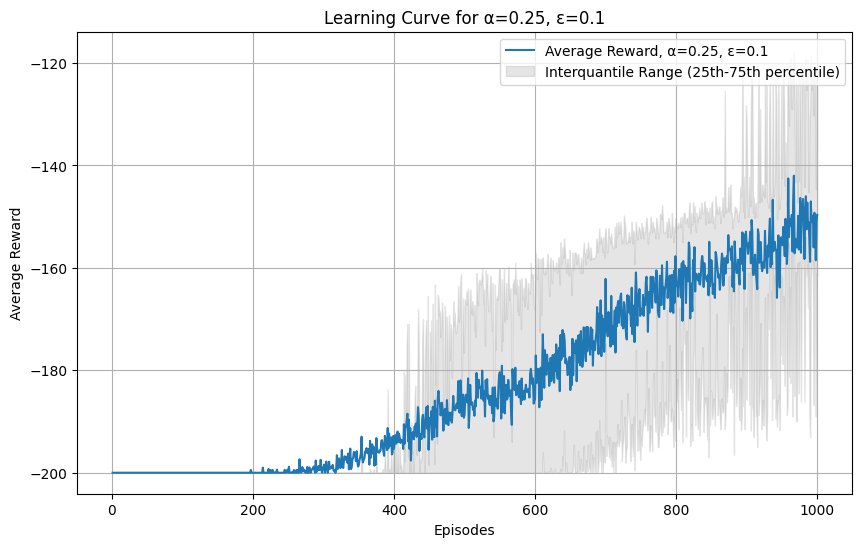

In [ ]:
alpha = 1/4
epsilon = .1

rewards2 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards2, alpha, epsilon)

Trial 1/50: Average Reward = -182.142
Trial 2/50: Average Reward = -181.785
Trial 3/50: Average Reward = -184.003
Trial 4/50: Average Reward = -183.263
Trial 5/50: Average Reward = -180.958
Trial 6/50: Average Reward = -179.068
Trial 7/50: Average Reward = -181.625
Trial 8/50: Average Reward = -184.156
Trial 9/50: Average Reward = -182.795
Trial 10/50: Average Reward = -181.98
Trial 11/50: Average Reward = -181.181
Trial 12/50: Average Reward = -181.58
Trial 13/50: Average Reward = -182.831
Trial 14/50: Average Reward = -181.904
Trial 15/50: Average Reward = -182.5
Trial 16/50: Average Reward = -181.368
Trial 17/50: Average Reward = -182.01
Trial 18/50: Average Reward = -181.758
Trial 19/50: Average Reward = -182.349
Trial 20/50: Average Reward = -181.658
Trial 21/50: Average Reward = -180.522
Trial 22/50: Average Reward = -182.024
Trial 23/50: Average Reward = -179.574
Trial 24/50: Average Reward = -183.037
Trial 25/50: Average Reward = -182.064
Trial 26/50: Average Reward = -182.869


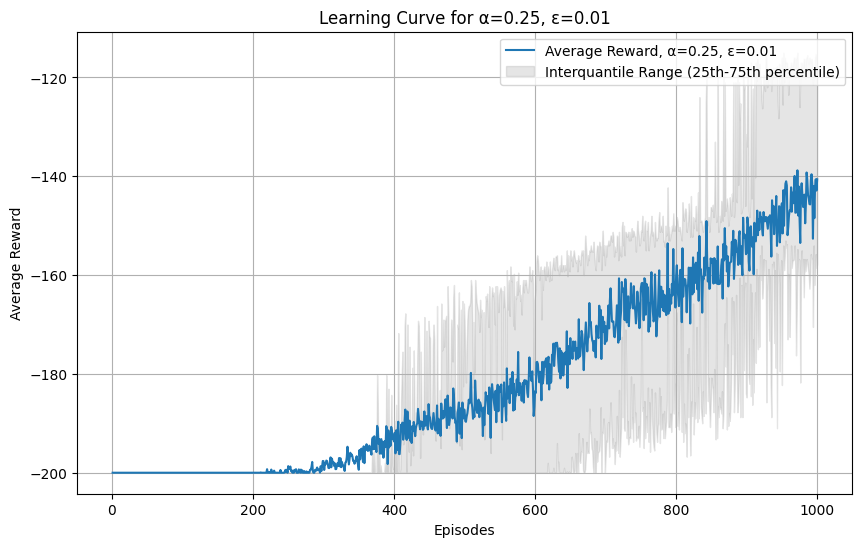

In [ ]:
alpha = 1/4
epsilon = .01

rewards3 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards3, alpha, epsilon)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Trial 1/50: Average Reward = -196.956
Trial 2/50: Average Reward = -196.942
Trial 3/50: Average Reward = -197.242
Trial 4/50: Average Reward = -197.011
Trial 5/50: Average Reward = -196.839
Trial 6/50: Average Reward = -197.301
Trial 7/50: Average Reward = -196.584
Trial 8/50: Average Reward = -196.827
Trial 9/50: Average Reward = -197.141
Trial 10/50: Average Reward = -196.804
Trial 11/50: Average Reward = -196.822
Trial 12/50: Average Reward = -196.793
Trial 13/50: Average Reward = -197.369
Trial 14/50: Average Reward = -197.672
Trial 15/50: Average Reward = -197.387
Trial 16/50: Average Reward = -197.426
Trial 17/50: Average Reward = -197.522
Trial 18/50: Average Reward = -196.812
Trial 19/50: Average Reward = -197.308
Trial 20/50: Average Reward = -197.413
Trial 21/50: Average Reward = -197.731
Trial 22/50: Average Reward = -196.932
Trial 23/50: Average Reward = -197.306
Trial 24/50: Average Reward = -197.189
Trial 25/50: Average Reward = -197.204
Trial 26/50: Average Reward = -197

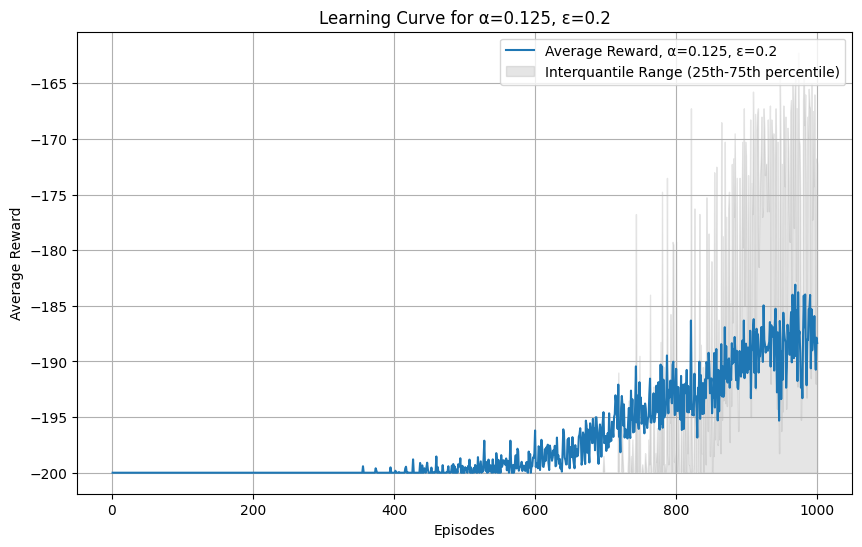

In [ ]:
alpha = 1/8
epsilon = .2

rewards4 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards4, alpha, epsilon)

Trial 1/50: Average Reward = -197.248
Trial 2/50: Average Reward = -197.409
Trial 3/50: Average Reward = -197.248
Trial 4/50: Average Reward = -197.456
Trial 5/50: Average Reward = -196.519
Trial 6/50: Average Reward = -197.178
Trial 7/50: Average Reward = -197.133
Trial 8/50: Average Reward = -197.484
Trial 9/50: Average Reward = -197.076
Trial 10/50: Average Reward = -197.637
Trial 11/50: Average Reward = -197.057
Trial 12/50: Average Reward = -196.962
Trial 13/50: Average Reward = -196.733
Trial 14/50: Average Reward = -197.734
Trial 15/50: Average Reward = -197.057
Trial 16/50: Average Reward = -197.522
Trial 17/50: Average Reward = -197.411
Trial 18/50: Average Reward = -197.565
Trial 19/50: Average Reward = -196.657
Trial 20/50: Average Reward = -196.72
Trial 21/50: Average Reward = -197.46
Trial 22/50: Average Reward = -197.443
Trial 23/50: Average Reward = -197.415
Trial 24/50: Average Reward = -197.203
Trial 25/50: Average Reward = -195.765
Trial 26/50: Average Reward = -197.5

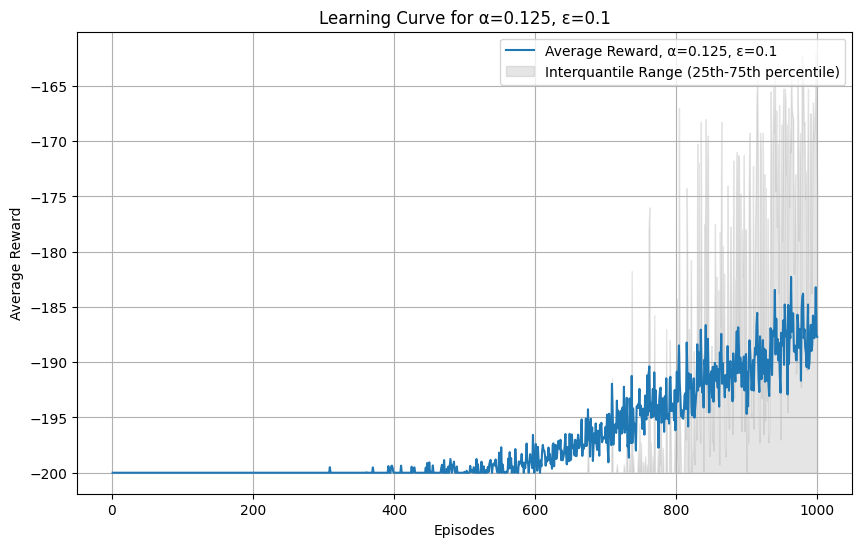

In [ ]:
alpha = 1/8
epsilon = .1

rewards5 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards5, alpha, epsilon)

Trial 1/50: Average Reward = -197.001
Trial 2/50: Average Reward = -196.527
Trial 3/50: Average Reward = -197.191
Trial 4/50: Average Reward = -197.324
Trial 5/50: Average Reward = -197.033
Trial 6/50: Average Reward = -196.775
Trial 7/50: Average Reward = -197.733
Trial 8/50: Average Reward = -197.664
Trial 9/50: Average Reward = -197.932
Trial 10/50: Average Reward = -197.216
Trial 11/50: Average Reward = -196.672
Trial 12/50: Average Reward = -196.813
Trial 13/50: Average Reward = -197.674
Trial 14/50: Average Reward = -196.326
Trial 15/50: Average Reward = -197.82
Trial 16/50: Average Reward = -197.356
Trial 17/50: Average Reward = -197.243
Trial 18/50: Average Reward = -197.338
Trial 19/50: Average Reward = -197.02
Trial 20/50: Average Reward = -196.977
Trial 21/50: Average Reward = -197.248
Trial 22/50: Average Reward = -197.195
Trial 23/50: Average Reward = -197.868
Trial 24/50: Average Reward = -196.266
Trial 25/50: Average Reward = -197.604
Trial 26/50: Average Reward = -197.6

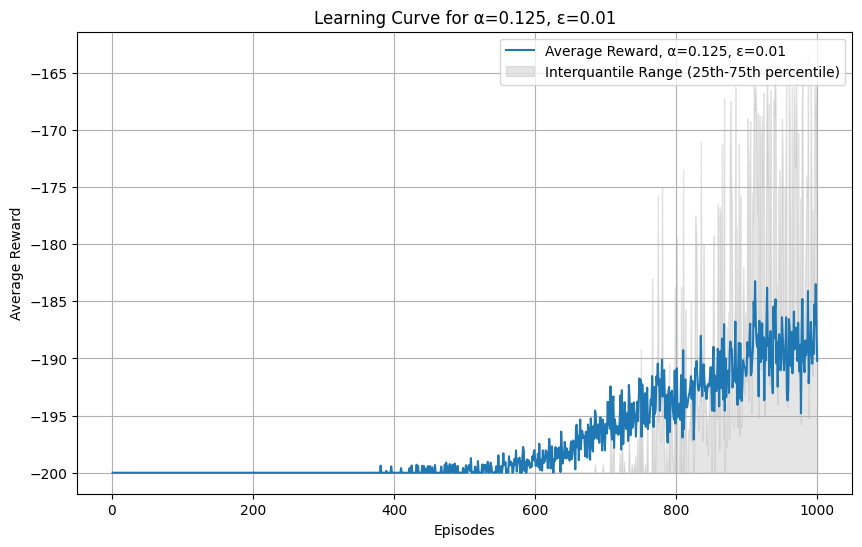

In [ ]:
alpha = 1/8
epsilon = .01

rewards6 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards6, alpha, epsilon)

Trial 1/50: Average Reward = -199.933
Trial 2/50: Average Reward = -199.986
Trial 3/50: Average Reward = -200.0
Trial 4/50: Average Reward = -199.979
Trial 5/50: Average Reward = -199.972
Trial 6/50: Average Reward = -199.924
Trial 7/50: Average Reward = -199.956
Trial 8/50: Average Reward = -199.998
Trial 9/50: Average Reward = -200.0
Trial 10/50: Average Reward = -199.987
Trial 11/50: Average Reward = -199.943
Trial 12/50: Average Reward = -199.937
Trial 13/50: Average Reward = -199.98
Trial 14/50: Average Reward = -199.97
Trial 15/50: Average Reward = -199.989
Trial 16/50: Average Reward = -200.0
Trial 17/50: Average Reward = -200.0
Trial 18/50: Average Reward = -200.0
Trial 19/50: Average Reward = -199.951
Trial 20/50: Average Reward = -199.969
Trial 21/50: Average Reward = -199.98
Trial 22/50: Average Reward = -199.972
Trial 23/50: Average Reward = -199.966
Trial 24/50: Average Reward = -199.966
Trial 25/50: Average Reward = -199.973
Trial 26/50: Average Reward = -200.0
Trial 27/5

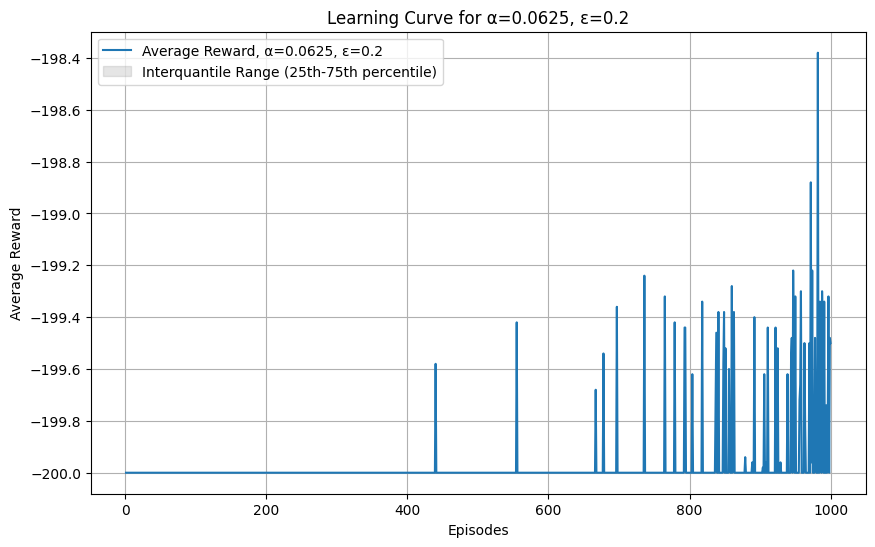

In [ ]:
alpha = 1/16
epsilon = .2

rewards7 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards7, alpha, epsilon)

Trial 1/50: Average Reward = -199.967
Trial 2/50: Average Reward = -199.971
Trial 3/50: Average Reward = -199.966
Trial 4/50: Average Reward = -199.985
Trial 5/50: Average Reward = -200.0
Trial 6/50: Average Reward = -199.991
Trial 7/50: Average Reward = -199.969
Trial 8/50: Average Reward = -200.0
Trial 9/50: Average Reward = -199.997
Trial 10/50: Average Reward = -199.976
Trial 11/50: Average Reward = -199.935
Trial 12/50: Average Reward = -199.973
Trial 13/50: Average Reward = -199.962
Trial 14/50: Average Reward = -199.946
Trial 15/50: Average Reward = -199.976
Trial 16/50: Average Reward = -199.973
Trial 17/50: Average Reward = -200.0
Trial 18/50: Average Reward = -199.959
Trial 19/50: Average Reward = -200.0
Trial 20/50: Average Reward = -199.976
Trial 21/50: Average Reward = -200.0
Trial 22/50: Average Reward = -199.998
Trial 23/50: Average Reward = -199.975
Trial 24/50: Average Reward = -199.969
Trial 25/50: Average Reward = -199.976
Trial 26/50: Average Reward = -199.936
Trial

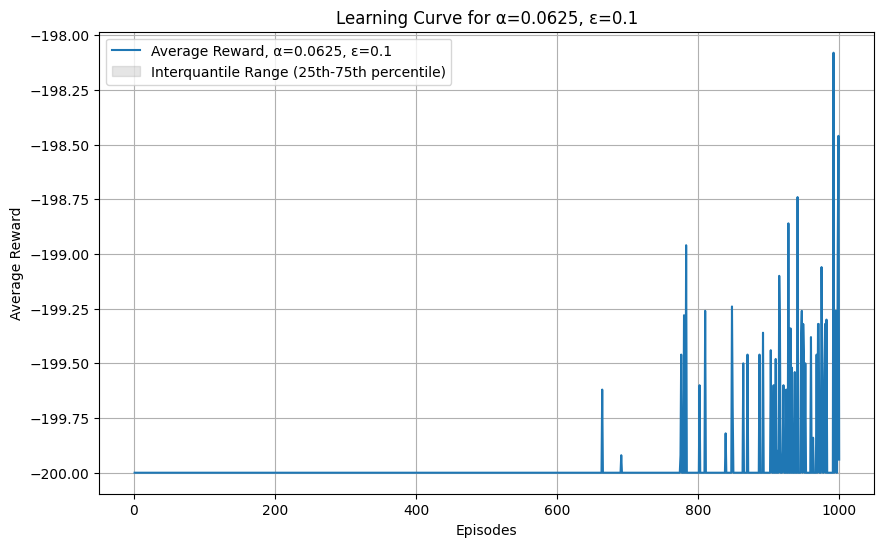

In [ ]:
alpha = 1/16
epsilon = .1

rewards8 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards8, alpha, epsilon)

Trial 1/50: Average Reward = -199.974
Trial 2/50: Average Reward = -199.948
Trial 3/50: Average Reward = -199.983
Trial 4/50: Average Reward = -199.926
Trial 5/50: Average Reward = -199.968
Trial 6/50: Average Reward = -199.923
Trial 7/50: Average Reward = -199.997
Trial 8/50: Average Reward = -199.925
Trial 9/50: Average Reward = -200.0
Trial 10/50: Average Reward = -200.0
Trial 11/50: Average Reward = -199.998
Trial 12/50: Average Reward = -200.0
Trial 13/50: Average Reward = -199.958
Trial 14/50: Average Reward = -200.0
Trial 15/50: Average Reward = -199.976
Trial 16/50: Average Reward = -199.917
Trial 17/50: Average Reward = -200.0
Trial 18/50: Average Reward = -199.982
Trial 19/50: Average Reward = -199.966
Trial 20/50: Average Reward = -200.0
Trial 21/50: Average Reward = -199.96
Trial 22/50: Average Reward = -199.978
Trial 23/50: Average Reward = -199.97
Trial 24/50: Average Reward = -200.0
Trial 25/50: Average Reward = -200.0
Trial 26/50: Average Reward = -199.949
Trial 27/50: 

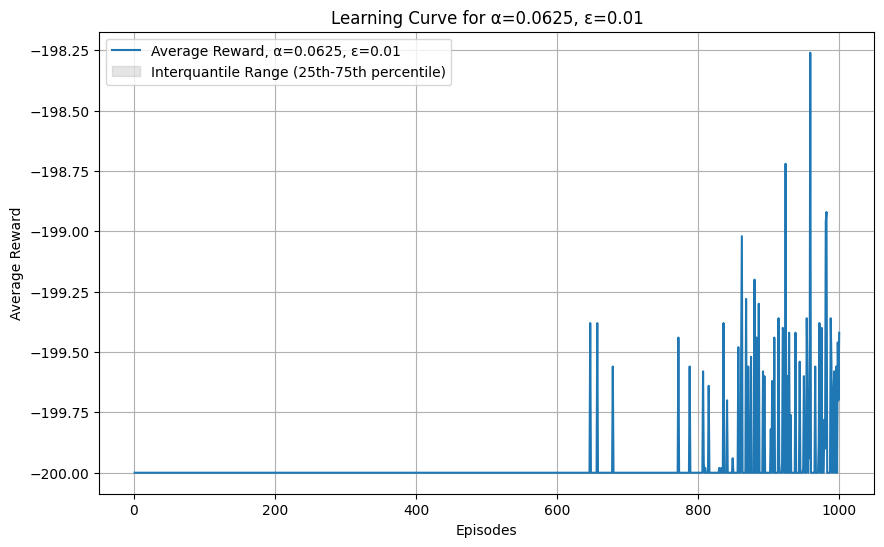

In [ ]:
alpha = 1/16
epsilon = .01

rewards9 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards9, alpha, epsilon)

In [ ]:
#import pickle
#with open('performance_summary.pkl', 'wb') as f:
#    pickle.dump(performance_summary, f)
#
#from google.colab import files
#files.download('performance_summary1.pkl')


In [ ]:
env = gym.make('CartPole-v1')
num_tilings = 3
max_size = 1875
num_actions = env.action_space.n
gamma = 1.0
tiles_per_dim = 3

#alphas = [1/4, 1/8, 1/16]
#epsilons = [0.1, 0.01, 0.001]
num_trials = 50
num_episodes = 1000

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


<ipython-input-4-9e2b30301187>:15: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Trial 1/50: Average Reward = 26.703
Trial 2/50: Average Reward = 26.88
Trial 3/50: Average Reward = 28.796
Trial 4/50: Average Reward = 28.237
Trial 5/50: Average Reward = 26.56
Trial 6/50: Average Reward = 26.907
Trial 7/50: Average Reward = 28.584
Trial 8/50: Average Reward = 29.139
Trial 9/50: Average Reward = 26.591
Trial 10/50: Average Reward = 27.682
Trial 11/50: Average Reward = 27.459
Trial 12/50: Average Reward = 27.229
Trial 13/50: Average Reward = 28.079
Trial 14/50: Average Reward = 26.222
Trial 15/50: Average Reward = 26.983
Trial 16/50: Average Reward = 28.675
Trial 17/50: Average Reward = 28.857
Trial 18/50: Average Reward = 26.904
Trial 19/50: Average Reward = 26.843
Trial 20/50: Average Reward = 26.273
Trial 21/50: Average Reward = 25.384
Trial 22/50: Average Reward = 27.808
Trial 23/50: Average Reward = 26.826
Trial 24/50: Average Reward = 27.694
Trial 25/50: Average Reward = 27.142
Trial 26/50: Average Reward = 26.11
Trial 27/50: Average Reward = 27.262
Trial 28/50: 

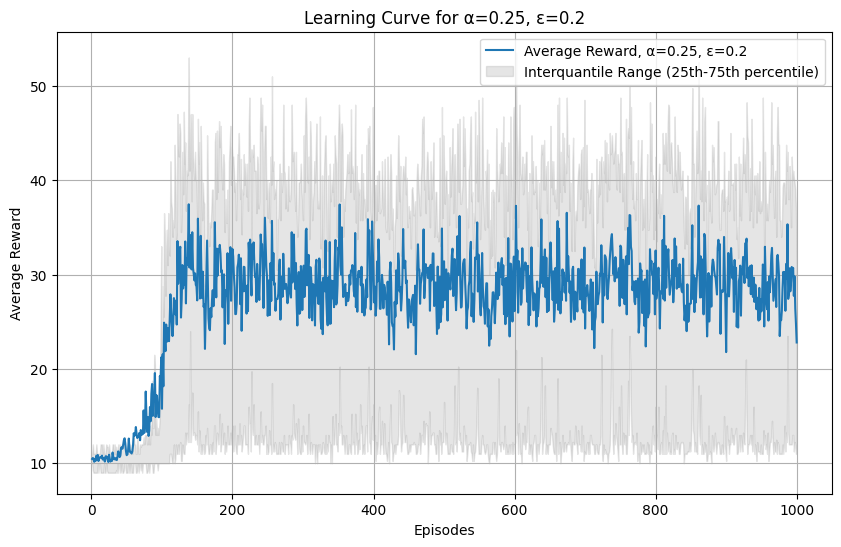

In [ ]:
alpha = 1/4
epsilon = .2

rewards1 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards1, alpha, epsilon)

<ipython-input-4-9e2b30301187>:15: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 28.821
Trial 2/50: Average Reward = 28.4
Trial 3/50: Average Reward = 27.535
Trial 4/50: Average Reward = 27.926
Trial 5/50: Average Reward = 28.686
Trial 6/50: Average Reward = 29.163
Trial 7/50: Average Reward = 30.123
Trial 8/50: Average Reward = 28.824
Trial 9/50: Average Reward = 28.358
Trial 10/50: Average Reward = 28.387
Trial 11/50: Average Reward = 26.585
Trial 12/50: Average Reward = 27.28
Trial 13/50: Average Reward = 27.104
Trial 14/50: Average Reward = 26.971
Trial 15/50: Average Reward = 27.816
Trial 16/50: Average Reward = 28.355
Trial 17/50: Average Reward = 27.624
Trial 18/50: Average Reward = 26.307
Trial 19/50: Average Reward = 27.957
Trial 20/50: Average Reward = 30.264
Trial 21/50: Average Reward = 29.05
Trial 22/50: Average Reward = 26.607
Trial 23/50: Average Reward = 27.809
Trial 24/50: Average Reward = 26.509
Trial 25/50: Average Reward = 26.956
Trial 26/50: Average Reward = 28.355
Trial 27/50: Average Reward = 28.704
Trial 28/50: A

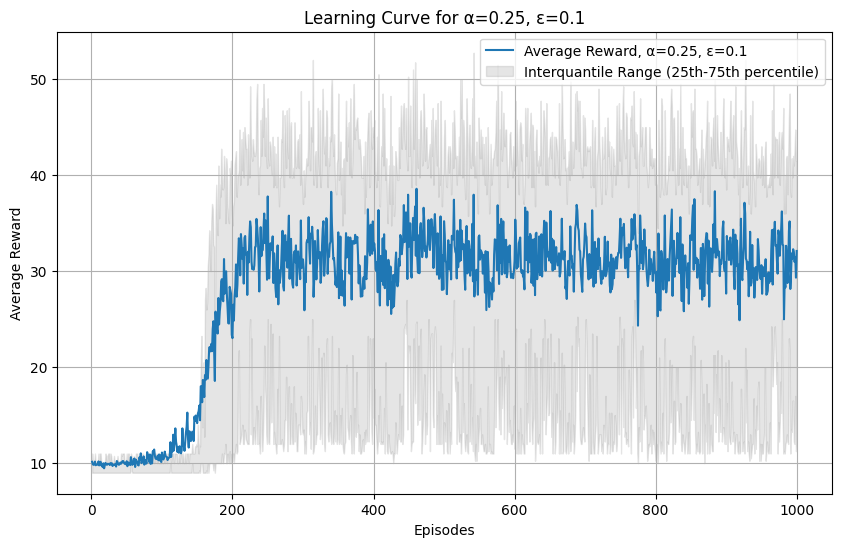

In [ ]:
alpha = 1/4
epsilon = .1

rewards2 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards2, alpha, epsilon)

<ipython-input-4-9e2b30301187>:15: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 9.416
Trial 2/50: Average Reward = 14.317
Trial 3/50: Average Reward = 21.851
Trial 4/50: Average Reward = 15.594
Trial 5/50: Average Reward = 9.425
Trial 6/50: Average Reward = 13.698
Trial 7/50: Average Reward = 11.313
Trial 8/50: Average Reward = 9.828
Trial 9/50: Average Reward = 9.384
Trial 10/50: Average Reward = 10.367
Trial 11/50: Average Reward = 16.864
Trial 12/50: Average Reward = 9.4
Trial 13/50: Average Reward = 9.421
Trial 14/50: Average Reward = 13.339
Trial 15/50: Average Reward = 9.401
Trial 16/50: Average Reward = 9.398
Trial 17/50: Average Reward = 12.372
Trial 18/50: Average Reward = 12.299
Trial 19/50: Average Reward = 9.385
Trial 20/50: Average Reward = 9.397
Trial 21/50: Average Reward = 9.354
Trial 22/50: Average Reward = 9.358
Trial 23/50: Average Reward = 9.411
Trial 24/50: Average Reward = 14.425
Trial 25/50: Average Reward = 11.833
Trial 26/50: Average Reward = 9.381
Trial 27/50: Average Reward = 11.818
Trial 28/50: Average Rewar

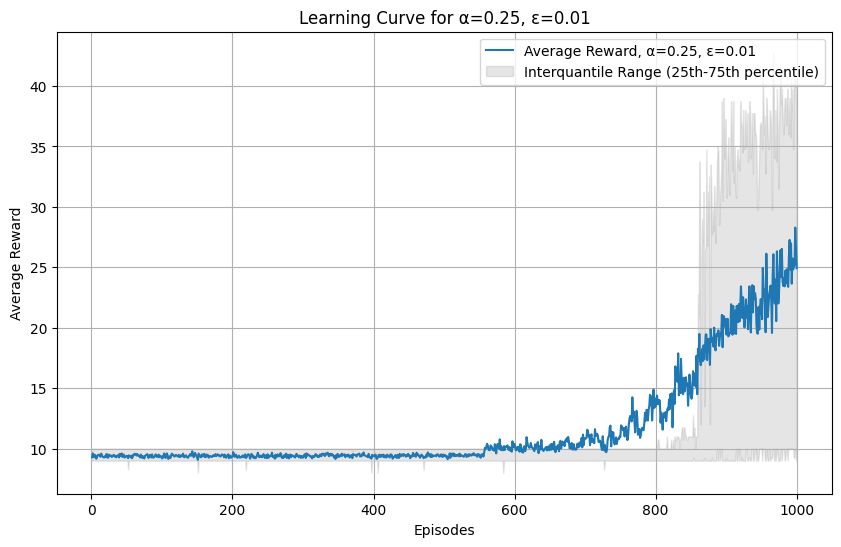

In [ ]:
alpha = 1/4
epsilon = .01

rewards3 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards3, alpha, epsilon)

<ipython-input-4-9e2b30301187>:15: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 30.517
Trial 2/50: Average Reward = 26.839
Trial 3/50: Average Reward = 29.598
Trial 4/50: Average Reward = 29.97
Trial 5/50: Average Reward = 27.86
Trial 6/50: Average Reward = 27.077
Trial 7/50: Average Reward = 28.317
Trial 8/50: Average Reward = 26.99
Trial 9/50: Average Reward = 26.233
Trial 10/50: Average Reward = 27.183
Trial 11/50: Average Reward = 27.048
Trial 12/50: Average Reward = 28.732
Trial 13/50: Average Reward = 27.769
Trial 14/50: Average Reward = 27.605
Trial 15/50: Average Reward = 27.865
Trial 16/50: Average Reward = 25.917
Trial 17/50: Average Reward = 27.686
Trial 18/50: Average Reward = 28.445
Trial 19/50: Average Reward = 31.261
Trial 20/50: Average Reward = 28.493
Trial 21/50: Average Reward = 29.787
Trial 22/50: Average Reward = 27.509
Trial 23/50: Average Reward = 28.094
Trial 24/50: Average Reward = 28.711
Trial 25/50: Average Reward = 28.207
Trial 26/50: Average Reward = 27.583
Trial 27/50: Average Reward = 28.907
Trial 28/50: 

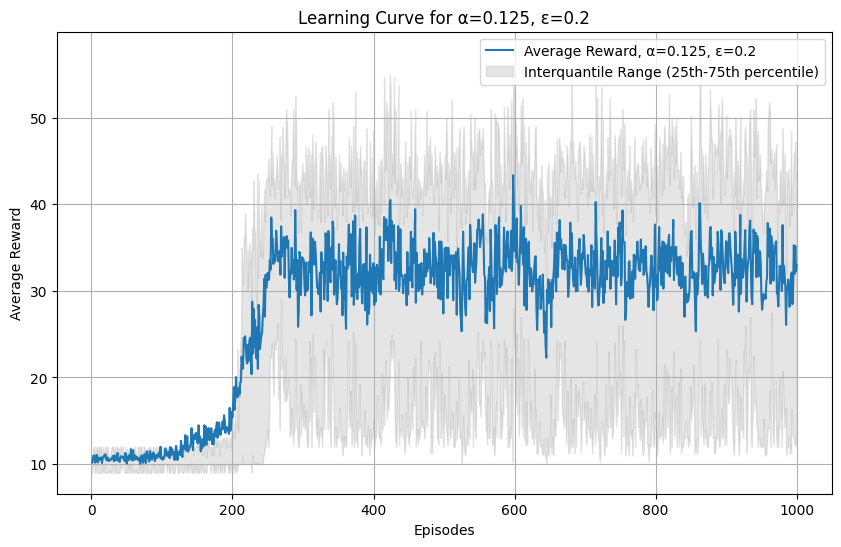

In [ ]:
alpha = 1/8
epsilon = .2

rewards4 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards4, alpha, epsilon)

<ipython-input-4-9e2b30301187>:15: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 25.507
Trial 2/50: Average Reward = 26.932
Trial 3/50: Average Reward = 28.777
Trial 4/50: Average Reward = 24.674
Trial 5/50: Average Reward = 22.649
Trial 6/50: Average Reward = 23.973
Trial 7/50: Average Reward = 27.381
Trial 8/50: Average Reward = 23.839
Trial 9/50: Average Reward = 21.96
Trial 10/50: Average Reward = 24.438
Trial 11/50: Average Reward = 25.532
Trial 12/50: Average Reward = 24.872
Trial 13/50: Average Reward = 25.122
Trial 14/50: Average Reward = 26.168
Trial 15/50: Average Reward = 26.864
Trial 16/50: Average Reward = 26.024
Trial 17/50: Average Reward = 25.741
Trial 18/50: Average Reward = 25.169
Trial 19/50: Average Reward = 25.205
Trial 20/50: Average Reward = 24.364
Trial 21/50: Average Reward = 25.067
Trial 22/50: Average Reward = 22.424
Trial 23/50: Average Reward = 24.872
Trial 24/50: Average Reward = 26.015
Trial 25/50: Average Reward = 26.822
Trial 26/50: Average Reward = 25.06
Trial 27/50: Average Reward = 25.906
Trial 28/50:

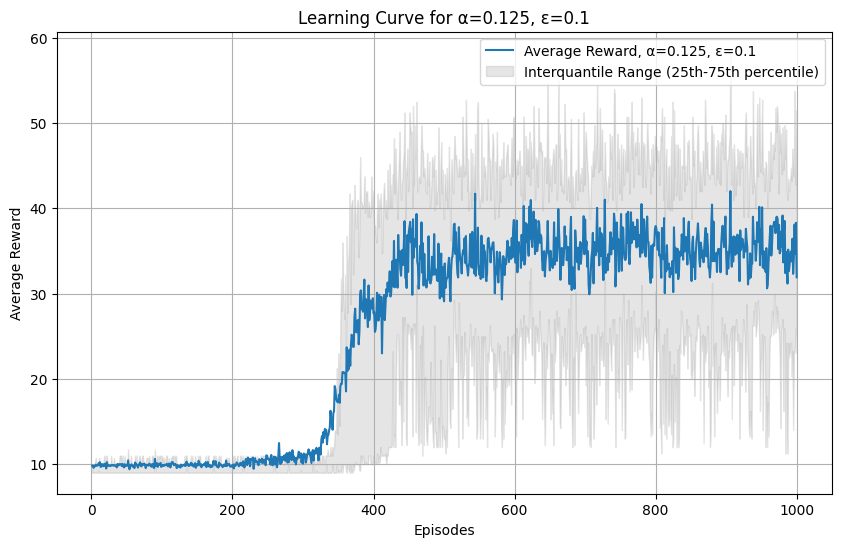

In [ ]:
alpha = 1/8
epsilon = .1

rewards5 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards5, alpha, epsilon)

<ipython-input-4-9e2b30301187>:15: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 9.405
Trial 2/50: Average Reward = 9.358
Trial 3/50: Average Reward = 9.408
Trial 4/50: Average Reward = 9.458
Trial 5/50: Average Reward = 9.445
Trial 6/50: Average Reward = 9.406
Trial 7/50: Average Reward = 9.357
Trial 8/50: Average Reward = 9.372
Trial 9/50: Average Reward = 9.413
Trial 10/50: Average Reward = 9.412
Trial 11/50: Average Reward = 9.361
Trial 12/50: Average Reward = 9.376
Trial 13/50: Average Reward = 9.442
Trial 14/50: Average Reward = 9.421
Trial 15/50: Average Reward = 9.351
Trial 16/50: Average Reward = 9.424
Trial 17/50: Average Reward = 9.422
Trial 18/50: Average Reward = 9.387
Trial 19/50: Average Reward = 9.408
Trial 20/50: Average Reward = 9.419
Trial 21/50: Average Reward = 9.444
Trial 22/50: Average Reward = 9.418
Trial 23/50: Average Reward = 9.398
Trial 24/50: Average Reward = 9.4
Trial 25/50: Average Reward = 9.401
Trial 26/50: Average Reward = 9.376
Trial 27/50: Average Reward = 9.427
Trial 28/50: Average Reward = 9.435
Tri

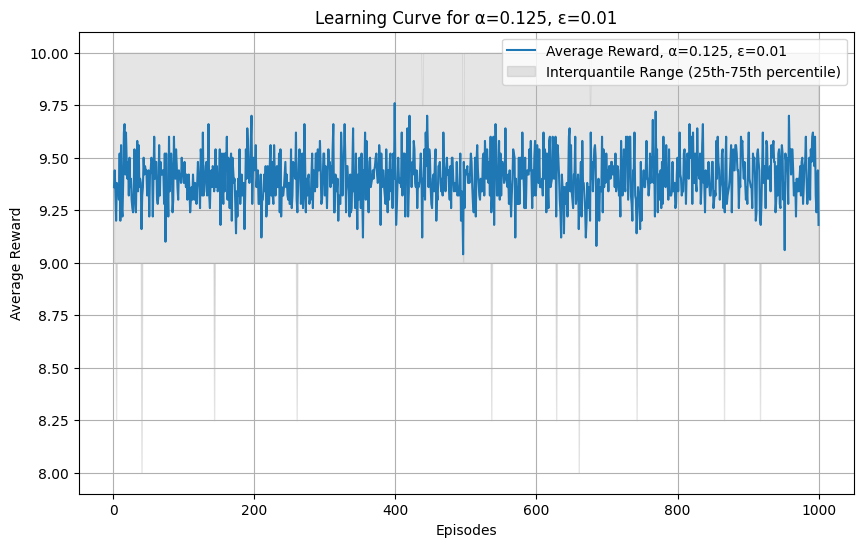

In [ ]:
alpha = 1/8
epsilon = .01

rewards6 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards6, alpha, epsilon)

<ipython-input-4-9e2b30301187>:15: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 21.368
Trial 2/50: Average Reward = 26.666
Trial 3/50: Average Reward = 21.786
Trial 4/50: Average Reward = 27.069
Trial 5/50: Average Reward = 24.573
Trial 6/50: Average Reward = 24.966
Trial 7/50: Average Reward = 23.365
Trial 8/50: Average Reward = 23.079
Trial 9/50: Average Reward = 27.967
Trial 10/50: Average Reward = 21.838
Trial 11/50: Average Reward = 22.755
Trial 12/50: Average Reward = 26.309
Trial 13/50: Average Reward = 24.992
Trial 14/50: Average Reward = 23.147
Trial 15/50: Average Reward = 25.185
Trial 16/50: Average Reward = 22.217
Trial 17/50: Average Reward = 21.125
Trial 18/50: Average Reward = 23.17
Trial 19/50: Average Reward = 23.815
Trial 20/50: Average Reward = 22.65
Trial 21/50: Average Reward = 24.246
Trial 22/50: Average Reward = 24.877
Trial 23/50: Average Reward = 22.975
Trial 24/50: Average Reward = 19.528
Trial 25/50: Average Reward = 25.624
Trial 26/50: Average Reward = 18.879
Trial 27/50: Average Reward = 24.61
Trial 28/50: 

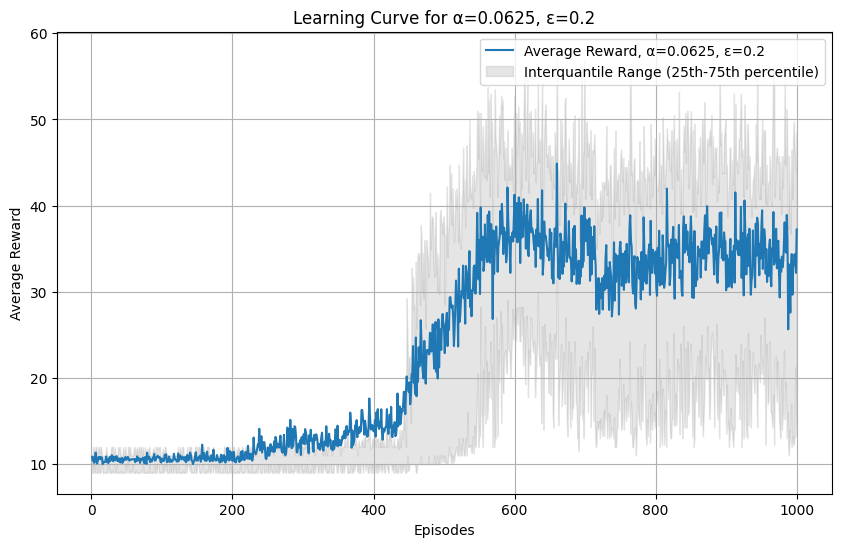

In [ ]:
alpha = 1/16
epsilon = .2

rewards7 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards7, alpha, epsilon)

<ipython-input-4-9e2b30301187>:15: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 17.634
Trial 2/50: Average Reward = 16.855
Trial 3/50: Average Reward = 13.129
Trial 4/50: Average Reward = 15.835
Trial 5/50: Average Reward = 16.142
Trial 6/50: Average Reward = 14.99
Trial 7/50: Average Reward = 15.167
Trial 8/50: Average Reward = 15.314
Trial 9/50: Average Reward = 12.505
Trial 10/50: Average Reward = 16.298
Trial 11/50: Average Reward = 14.848
Trial 12/50: Average Reward = 17.273
Trial 13/50: Average Reward = 16.661
Trial 14/50: Average Reward = 14.495
Trial 15/50: Average Reward = 15.786
Trial 16/50: Average Reward = 14.202
Trial 17/50: Average Reward = 13.984
Trial 18/50: Average Reward = 15.795
Trial 19/50: Average Reward = 13.522
Trial 20/50: Average Reward = 15.438
Trial 21/50: Average Reward = 13.124
Trial 22/50: Average Reward = 10.112
Trial 23/50: Average Reward = 15.187
Trial 24/50: Average Reward = 14.66
Trial 25/50: Average Reward = 14.41
Trial 26/50: Average Reward = 13.505
Trial 27/50: Average Reward = 13.535
Trial 28/50: 

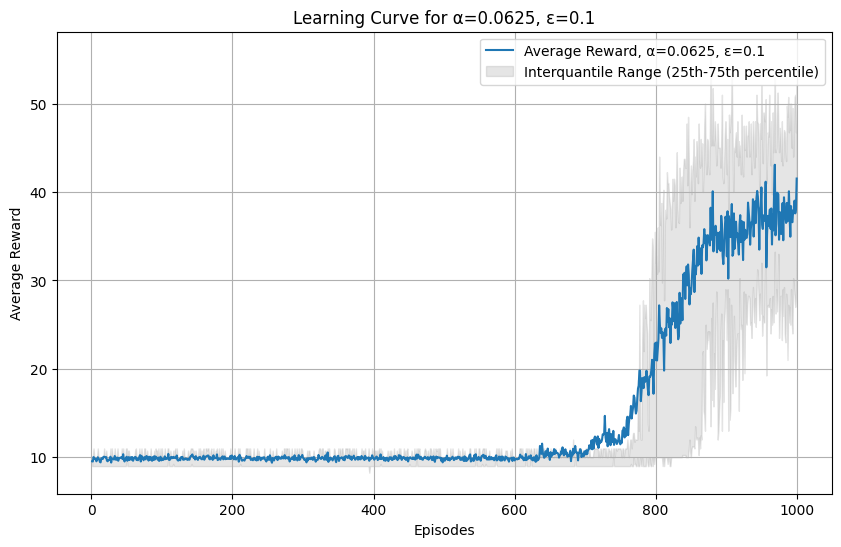

In [ ]:
alpha = 1/16
epsilon = .1

rewards8 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards8, alpha, epsilon)

<ipython-input-4-9e2b30301187>:15: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 9.378
Trial 2/50: Average Reward = 9.379
Trial 3/50: Average Reward = 9.44
Trial 4/50: Average Reward = 9.45
Trial 5/50: Average Reward = 9.437
Trial 6/50: Average Reward = 9.401
Trial 7/50: Average Reward = 9.379
Trial 8/50: Average Reward = 9.415
Trial 9/50: Average Reward = 9.442
Trial 10/50: Average Reward = 9.446
Trial 11/50: Average Reward = 9.371
Trial 12/50: Average Reward = 9.401
Trial 13/50: Average Reward = 9.442
Trial 14/50: Average Reward = 9.388
Trial 15/50: Average Reward = 9.37
Trial 16/50: Average Reward = 9.395
Trial 17/50: Average Reward = 9.389
Trial 18/50: Average Reward = 9.434
Trial 19/50: Average Reward = 9.4
Trial 20/50: Average Reward = 9.402
Trial 21/50: Average Reward = 9.375
Trial 22/50: Average Reward = 9.453
Trial 23/50: Average Reward = 9.424
Trial 24/50: Average Reward = 9.394
Trial 25/50: Average Reward = 9.401
Trial 26/50: Average Reward = 9.438
Trial 27/50: Average Reward = 9.364
Trial 28/50: Average Reward = 9.435
Trial 

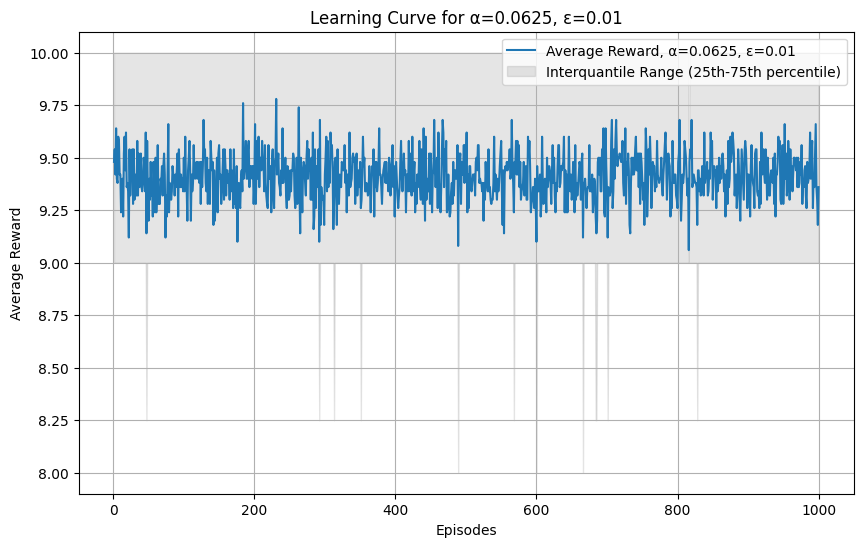

In [ ]:
alpha = 1/16
epsilon = .01

rewards9 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards9, alpha, epsilon)

In [116]:
class TileCoder:
    def __init__(self, num_tilings, tiles_per_dim, env):
        self.num_tilings = num_tilings
        self.tiles_per_dim = tiles_per_dim
        self.env = env


        self.max_size = num_tilings * (self.tiles_per_dim ** len(env.observation_space.high))


        self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)

        self.offsets = [(i / num_tilings) for i in range(num_tilings)]

    def get_features(self, state):
        features = []
        for tiling in range(self.num_tilings):
            offset_state = state + self.offsets[tiling]
            scaled_state = self.scaling * offset_state
            indices = np.floor(scaled_state).astype(int) % self.tiles_per_dim
            index = np.ravel_multi_index(indices, [self.tiles_per_dim] * len(state))
            index += tiling * (self.tiles_per_dim ** len(state))
            features.append(index)
        return features

class ExpSarsaAgent:
    def __init__(self, tile_coder, alpha, gamma, num_actions, epsilon):
        self.tile_coder = tile_coder
        self.alpha = alpha
        self.gamma = gamma
        self.num_actions = num_actions
        self.theta = np.random.uniform(-0.001, 0.001, (tile_coder.max_size, num_actions))
        self.epsilon = epsilon

    def select_action(self, state, epsilon):
        features = self.tile_coder.get_features(state)
        q_values = self.theta[features].mean(axis=0)
        if np.random.rand() < epsilon:
            return np.random.choice(self.num_actions)
        else:
            return np.argmax(q_values)

    def update(self, state, action, reward, next_state, done):
        features = self.tile_coder.get_features(state)
        next_features = self.tile_coder.get_features(next_state)

        q_values = self.theta[features, action].mean()

        q_values_next = self.theta[next_features].mean(axis=0)
        best_next_action = np.argmax(q_values_next)
        expected_q_value_next = np.sum([
            (self.epsilon / self.num_actions if a != best_next_action else (1 - self.epsilon + self.epsilon / self.num_actions)) * q_value
            for a, q_value in enumerate(q_values_next)
        ])

        target = reward if done else reward + self.gamma * expected_q_value_next
        self.theta[features, action] += self.alpha * (target - q_values) / len(features)


In [130]:
def train_agent(env, num_episodes, num_trials, alpha, epsilon):
    trial_rewards = np.zeros((num_trials, num_episodes))

    for trial in range(num_trials):

        tile_coder = TileCoder(num_tilings, tiles_per_dim, env)
        agent = ExpSarsaAgent(tile_coder, alpha, gamma, num_actions, epsilon)

        for episode in range(num_episodes):
            state = env.reset()
            total_reward = 0
            done = False
            while not done:
                action = agent.select_action(state, epsilon)
                next_state, reward, done, _ = env.step(action)
                agent.update(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward
            trial_rewards[trial, episode] = total_reward

        average_reward = np.mean(trial_rewards[trial])
        #print(f"Trial {trial + 1}/{num_trials}: Average Reward = {average_reward}")

    return trial_rewards

In [119]:
env = gym.make('CartPole-v1')
num_tilings = 3
max_size = 1875
num_actions = env.action_space.n
gamma = 1.0
tiles_per_dim = 3

#alphas = [1/4, 1/8, 1/16]
#epsilons = [0.1, 0.01, 0.001]
num_trials = 50
num_episodes = 1000

<ipython-input-29-82c2b2d30b7e>:11: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 28.533
Trial 2/50: Average Reward = 28.189
Trial 3/50: Average Reward = 28.037
Trial 4/50: Average Reward = 29.206
Trial 5/50: Average Reward = 28.793
Trial 6/50: Average Reward = 28.555
Trial 7/50: Average Reward = 28.305
Trial 8/50: Average Reward = 29.457
Trial 9/50: Average Reward = 28.465
Trial 10/50: Average Reward = 28.409
Trial 11/50: Average Reward = 29.001
Trial 12/50: Average Reward = 27.626
Trial 13/50: Average Reward = 29.183
Trial 14/50: Average Reward = 27.704
Trial 15/50: Average Reward = 29.193
Trial 16/50: Average Reward = 27.094
Trial 17/50: Average Reward = 28.168
Trial 18/50: Average Reward = 28.509
Trial 19/50: Average Reward = 28.629
Trial 20/50: Average Reward = 29.512
Trial 21/50: Average Reward = 28.949
Trial 22/50: Average Reward = 27.826
Trial 23/50: Average Reward = 28.115
Trial 24/50: Average Reward = 27.62
Trial 25/50: Average Reward = 27.34
Trial 26/50: Average Reward = 27.955
Trial 27/50: Average Reward = 28.677
Trial 28/50:

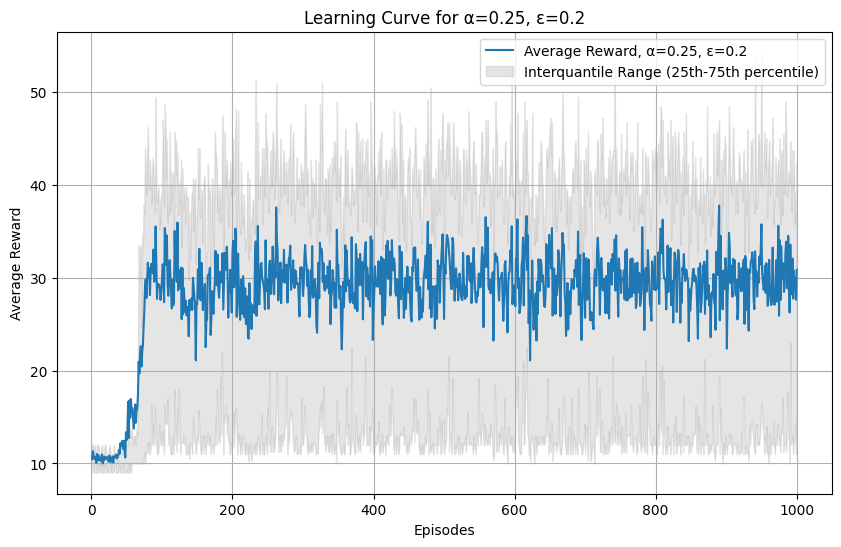

In [ ]:
alpha = 1/4
epsilon = .2

rewards1 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards1, alpha, epsilon)

<ipython-input-29-82c2b2d30b7e>:11: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 30.747
Trial 2/50: Average Reward = 31.219
Trial 3/50: Average Reward = 30.465
Trial 4/50: Average Reward = 30.71
Trial 5/50: Average Reward = 31.034
Trial 6/50: Average Reward = 31.722
Trial 7/50: Average Reward = 30.504
Trial 8/50: Average Reward = 31.133
Trial 9/50: Average Reward = 30.75
Trial 10/50: Average Reward = 29.641
Trial 11/50: Average Reward = 30.649
Trial 12/50: Average Reward = 30.153
Trial 13/50: Average Reward = 30.326
Trial 14/50: Average Reward = 29.475
Trial 15/50: Average Reward = 30.706
Trial 16/50: Average Reward = 28.436
Trial 17/50: Average Reward = 30.36
Trial 18/50: Average Reward = 31.83
Trial 19/50: Average Reward = 30.993
Trial 20/50: Average Reward = 29.536
Trial 21/50: Average Reward = 30.281
Trial 22/50: Average Reward = 30.963
Trial 23/50: Average Reward = 32.583
Trial 24/50: Average Reward = 29.82
Trial 25/50: Average Reward = 31.48
Trial 26/50: Average Reward = 31.396
Trial 27/50: Average Reward = 30.932
Trial 28/50: Ave

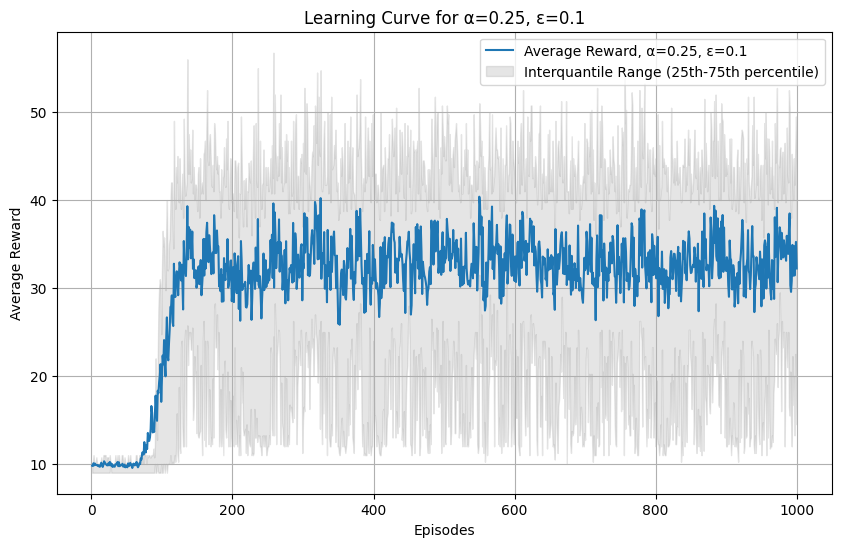

In [ ]:
alpha = 1/4
epsilon = .1

rewards2 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards2, alpha, epsilon)

<ipython-input-29-82c2b2d30b7e>:11: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 20.697
Trial 2/50: Average Reward = 23.347
Trial 3/50: Average Reward = 25.597
Trial 4/50: Average Reward = 15.904
Trial 5/50: Average Reward = 24.115
Trial 6/50: Average Reward = 16.126
Trial 7/50: Average Reward = 21.27
Trial 8/50: Average Reward = 28.551
Trial 9/50: Average Reward = 23.974
Trial 10/50: Average Reward = 21.558
Trial 11/50: Average Reward = 21.777
Trial 12/50: Average Reward = 15.286
Trial 13/50: Average Reward = 19.328
Trial 14/50: Average Reward = 17.778
Trial 15/50: Average Reward = 14.607
Trial 16/50: Average Reward = 22.079
Trial 17/50: Average Reward = 18.698
Trial 18/50: Average Reward = 16.374
Trial 19/50: Average Reward = 22.856
Trial 20/50: Average Reward = 9.426
Trial 21/50: Average Reward = 14.492
Trial 22/50: Average Reward = 11.805
Trial 23/50: Average Reward = 24.373
Trial 24/50: Average Reward = 25.3
Trial 25/50: Average Reward = 26.341
Trial 26/50: Average Reward = 21.3
Trial 27/50: Average Reward = 21.737
Trial 28/50: Ave

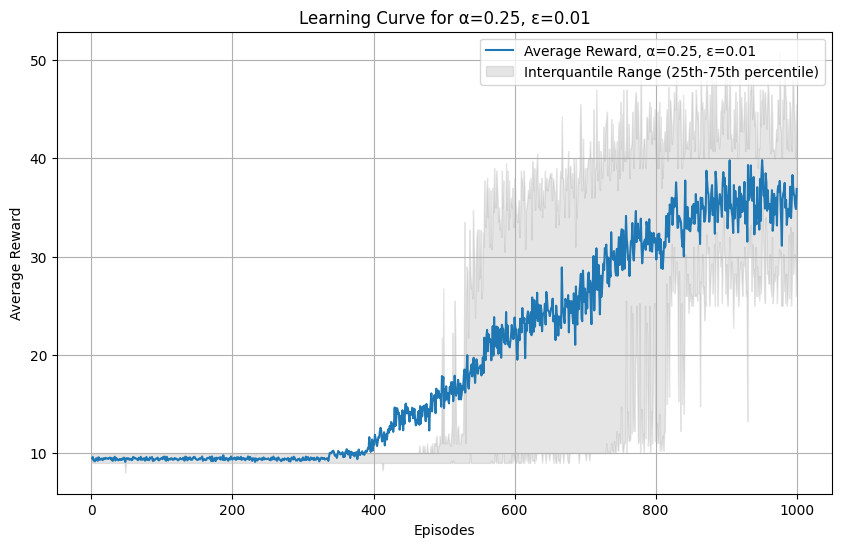

In [ ]:
alpha = 1/4
epsilon = .01

rewards3 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards3, alpha, epsilon)

<ipython-input-29-82c2b2d30b7e>:11: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 29.494
Trial 2/50: Average Reward = 29.065
Trial 3/50: Average Reward = 30.357
Trial 4/50: Average Reward = 30.371
Trial 5/50: Average Reward = 28.941
Trial 6/50: Average Reward = 29.891
Trial 7/50: Average Reward = 28.798
Trial 8/50: Average Reward = 28.818
Trial 9/50: Average Reward = 30.74
Trial 10/50: Average Reward = 30.301
Trial 11/50: Average Reward = 28.345
Trial 12/50: Average Reward = 30.029
Trial 13/50: Average Reward = 30.973
Trial 14/50: Average Reward = 31.239
Trial 15/50: Average Reward = 30.049
Trial 16/50: Average Reward = 28.866
Trial 17/50: Average Reward = 28.56
Trial 18/50: Average Reward = 28.544
Trial 19/50: Average Reward = 28.964
Trial 20/50: Average Reward = 27.886
Trial 21/50: Average Reward = 30.182
Trial 22/50: Average Reward = 30.645
Trial 23/50: Average Reward = 30.733
Trial 24/50: Average Reward = 29.819
Trial 25/50: Average Reward = 30.183
Trial 26/50: Average Reward = 29.567
Trial 27/50: Average Reward = 30.522
Trial 28/50:

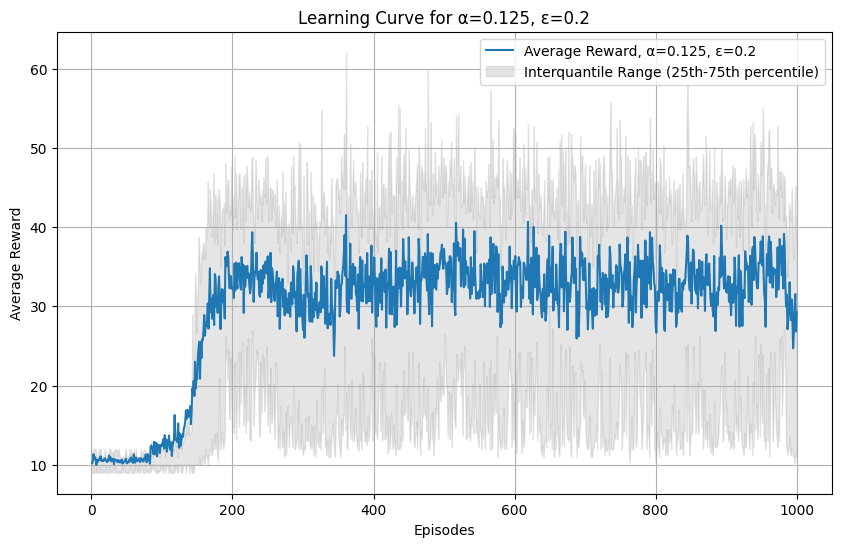

In [ ]:
alpha = 1/8
epsilon = .2

rewards4 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards4, alpha, epsilon)

<ipython-input-29-82c2b2d30b7e>:11: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 30.126
Trial 2/50: Average Reward = 31.215
Trial 3/50: Average Reward = 31.019
Trial 4/50: Average Reward = 29.581
Trial 5/50: Average Reward = 30.769
Trial 6/50: Average Reward = 30.704
Trial 7/50: Average Reward = 28.15
Trial 8/50: Average Reward = 30.766
Trial 9/50: Average Reward = 29.505
Trial 10/50: Average Reward = 27.583
Trial 11/50: Average Reward = 29.746
Trial 12/50: Average Reward = 27.794
Trial 13/50: Average Reward = 30.508
Trial 14/50: Average Reward = 29.19
Trial 15/50: Average Reward = 29.791
Trial 16/50: Average Reward = 31.812
Trial 17/50: Average Reward = 30.359
Trial 18/50: Average Reward = 30.275
Trial 19/50: Average Reward = 30.208
Trial 20/50: Average Reward = 28.298
Trial 21/50: Average Reward = 28.935
Trial 22/50: Average Reward = 29.265
Trial 23/50: Average Reward = 28.923
Trial 24/50: Average Reward = 30.009
Trial 25/50: Average Reward = 29.357
Trial 26/50: Average Reward = 29.282
Trial 27/50: Average Reward = 29.18
Trial 28/50: 

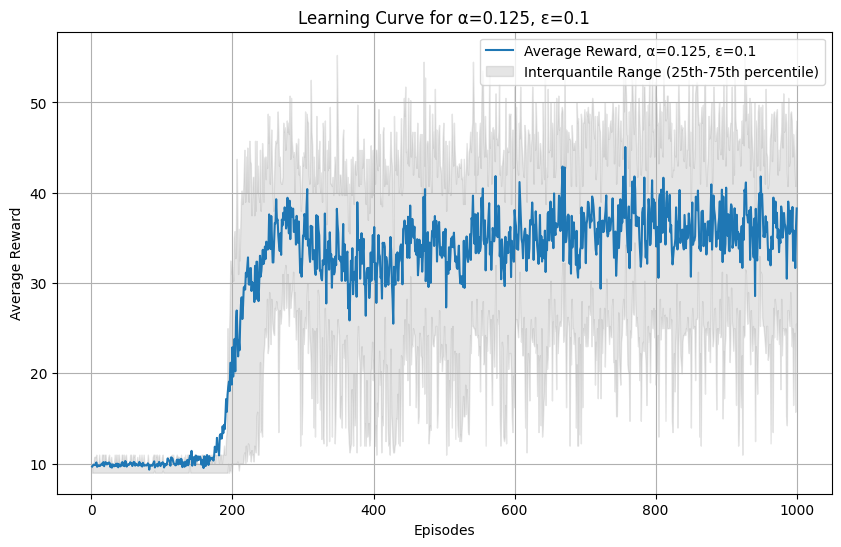

In [ ]:
alpha = 1/8
epsilon = .1

rewards5 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards5, alpha, epsilon)

<ipython-input-29-82c2b2d30b7e>:11: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 9.423
Trial 2/50: Average Reward = 9.379
Trial 3/50: Average Reward = 9.401
Trial 4/50: Average Reward = 9.383
Trial 5/50: Average Reward = 9.399
Trial 6/50: Average Reward = 9.376
Trial 7/50: Average Reward = 12.257
Trial 8/50: Average Reward = 9.405
Trial 9/50: Average Reward = 9.403
Trial 10/50: Average Reward = 9.371
Trial 11/50: Average Reward = 9.427
Trial 12/50: Average Reward = 9.408
Trial 13/50: Average Reward = 9.421
Trial 14/50: Average Reward = 9.419
Trial 15/50: Average Reward = 9.421
Trial 16/50: Average Reward = 9.416
Trial 17/50: Average Reward = 9.484
Trial 18/50: Average Reward = 9.406
Trial 19/50: Average Reward = 9.399
Trial 20/50: Average Reward = 9.444
Trial 21/50: Average Reward = 9.419
Trial 22/50: Average Reward = 9.429
Trial 23/50: Average Reward = 9.362
Trial 24/50: Average Reward = 9.41
Trial 25/50: Average Reward = 9.371
Trial 26/50: Average Reward = 9.395
Trial 27/50: Average Reward = 9.421
Trial 28/50: Average Reward = 9.422
T

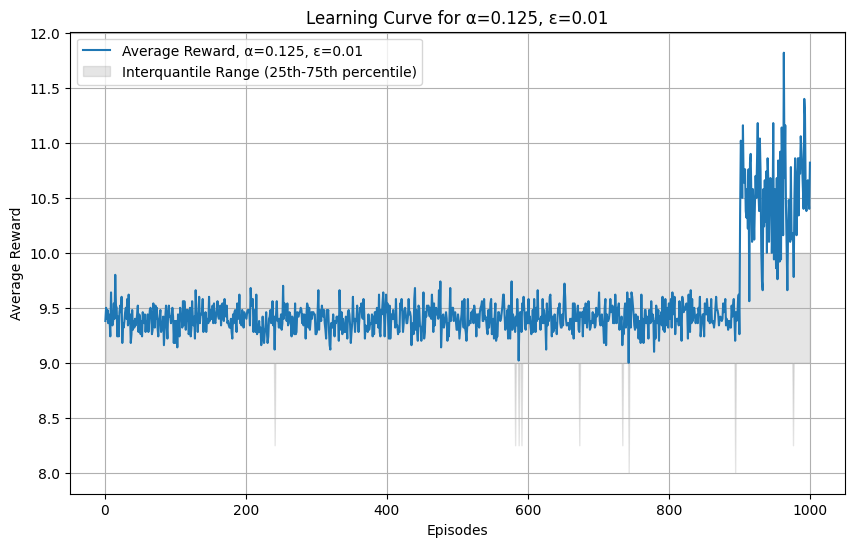

In [ ]:
alpha = 1/8
epsilon = .01

rewards6 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards6, alpha, epsilon)

<ipython-input-29-82c2b2d30b7e>:11: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 26.353
Trial 2/50: Average Reward = 26.911
Trial 3/50: Average Reward = 27.757
Trial 4/50: Average Reward = 27.826
Trial 5/50: Average Reward = 29.245
Trial 6/50: Average Reward = 28.137
Trial 7/50: Average Reward = 26.511
Trial 8/50: Average Reward = 26.756
Trial 9/50: Average Reward = 25.29
Trial 10/50: Average Reward = 26.467
Trial 11/50: Average Reward = 27.767
Trial 12/50: Average Reward = 27.446
Trial 13/50: Average Reward = 27.713
Trial 14/50: Average Reward = 29.112
Trial 15/50: Average Reward = 25.704
Trial 16/50: Average Reward = 26.026
Trial 17/50: Average Reward = 27.241
Trial 18/50: Average Reward = 25.808
Trial 19/50: Average Reward = 25.987
Trial 20/50: Average Reward = 25.324
Trial 21/50: Average Reward = 27.683
Trial 22/50: Average Reward = 26.436
Trial 23/50: Average Reward = 26.84
Trial 24/50: Average Reward = 25.65
Trial 25/50: Average Reward = 28.111
Trial 26/50: Average Reward = 26.64
Trial 27/50: Average Reward = 27.036
Trial 28/50: A

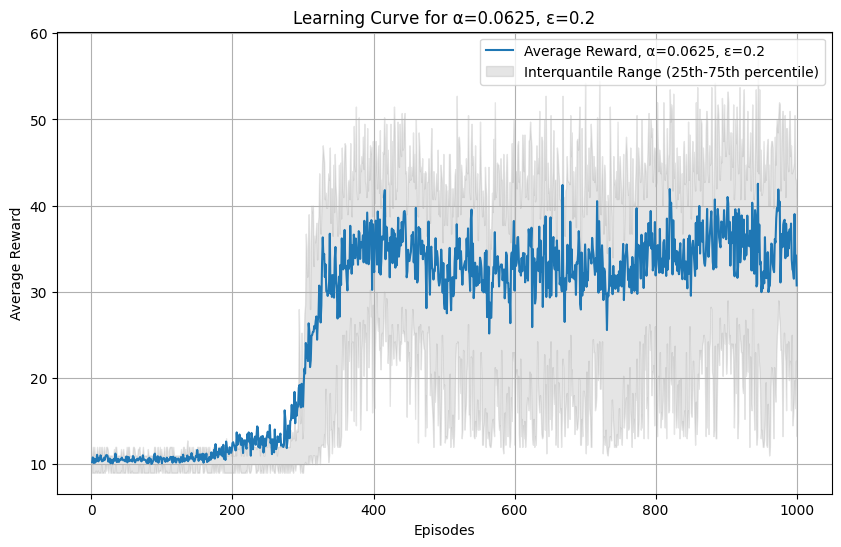

In [ ]:
alpha = 1/16
epsilon = .2

rewards7 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards7, alpha, epsilon)

<ipython-input-29-82c2b2d30b7e>:11: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 23.684
Trial 2/50: Average Reward = 25.19
Trial 3/50: Average Reward = 24.026
Trial 4/50: Average Reward = 24.75
Trial 5/50: Average Reward = 20.863
Trial 6/50: Average Reward = 22.868
Trial 7/50: Average Reward = 25.631
Trial 8/50: Average Reward = 24.208
Trial 9/50: Average Reward = 22.137
Trial 10/50: Average Reward = 22.362
Trial 11/50: Average Reward = 23.675
Trial 12/50: Average Reward = 20.763
Trial 13/50: Average Reward = 23.438
Trial 14/50: Average Reward = 24.115
Trial 15/50: Average Reward = 24.249
Trial 16/50: Average Reward = 23.356
Trial 17/50: Average Reward = 24.059
Trial 18/50: Average Reward = 24.055
Trial 19/50: Average Reward = 23.578
Trial 20/50: Average Reward = 25.15
Trial 21/50: Average Reward = 22.207
Trial 22/50: Average Reward = 24.359
Trial 23/50: Average Reward = 23.063
Trial 24/50: Average Reward = 23.394
Trial 25/50: Average Reward = 23.302
Trial 26/50: Average Reward = 24.028
Trial 27/50: Average Reward = 22.92
Trial 28/50: A

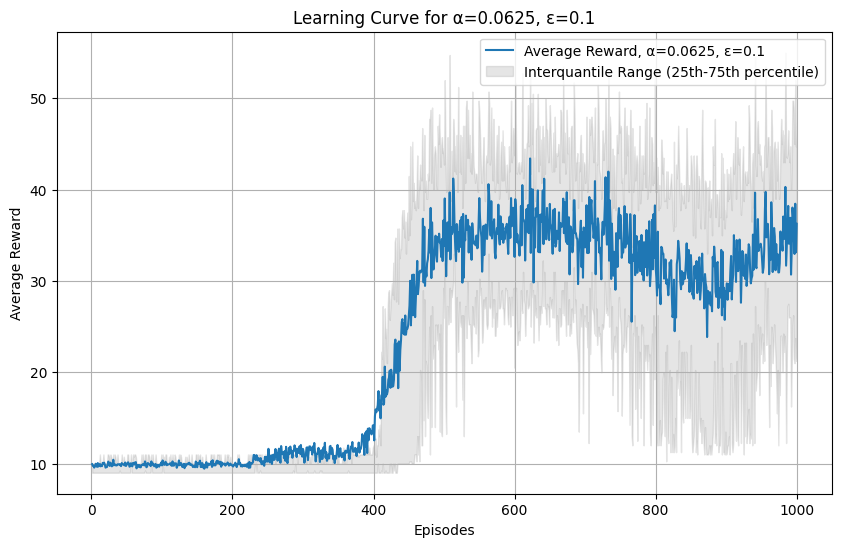

In [ ]:
alpha = 1/16
epsilon = .1

rewards8 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards8, alpha, epsilon)

<ipython-input-29-82c2b2d30b7e>:11: RuntimeWarning: overflow encountered in subtract
  self.scaling = self.tiles_per_dim / (env.observation_space.high - env.observation_space.low)


Trial 1/50: Average Reward = 9.414
Trial 2/50: Average Reward = 9.399
Trial 3/50: Average Reward = 9.402
Trial 4/50: Average Reward = 9.435
Trial 5/50: Average Reward = 9.398
Trial 6/50: Average Reward = 9.398
Trial 7/50: Average Reward = 9.369
Trial 8/50: Average Reward = 9.367
Trial 9/50: Average Reward = 9.381
Trial 10/50: Average Reward = 9.419
Trial 11/50: Average Reward = 9.361
Trial 12/50: Average Reward = 9.4
Trial 13/50: Average Reward = 9.444
Trial 14/50: Average Reward = 9.399
Trial 15/50: Average Reward = 9.419
Trial 16/50: Average Reward = 9.423
Trial 17/50: Average Reward = 9.378
Trial 18/50: Average Reward = 9.4
Trial 19/50: Average Reward = 9.424
Trial 20/50: Average Reward = 9.384
Trial 21/50: Average Reward = 9.358
Trial 22/50: Average Reward = 9.41
Trial 23/50: Average Reward = 9.375
Trial 24/50: Average Reward = 9.452
Trial 25/50: Average Reward = 9.414
Trial 26/50: Average Reward = 9.392
Trial 27/50: Average Reward = 9.428
Trial 28/50: Average Reward = 9.418
Trial 

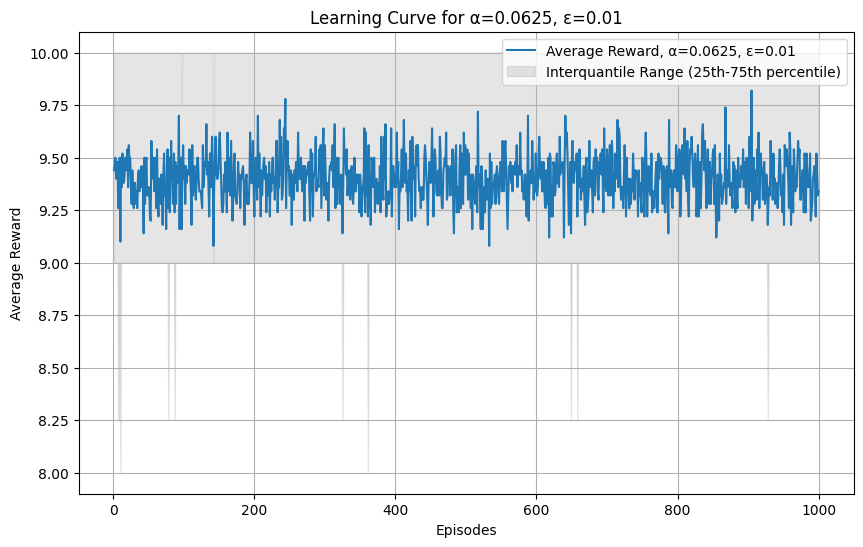

In [ ]:
alpha = 1/16
epsilon = .01

rewards9 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards9, alpha, epsilon)

In [ ]:
env = gym.make('MountainCar-v0')
num_tilings = 8
max_size = 2048
num_actions = env.action_space.n
gamma = 1.0
tiles_per_dim = 8
num_trials = 50
num_episodes = 1000

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Trial 1/50: Average Reward = -188.21
Trial 2/50: Average Reward = -188.368
Trial 3/50: Average Reward = -187.404
Trial 4/50: Average Reward = -188.056
Trial 5/50: Average Reward = -187.392
Trial 6/50: Average Reward = -187.395
Trial 7/50: Average Reward = -188.175
Trial 8/50: Average Reward = -187.521
Trial 9/50: Average Reward = -188.313
Trial 10/50: Average Reward = -187.889
Trial 11/50: Average Reward = -188.126
Trial 12/50: Average Reward = -187.454
Trial 13/50: Average Reward = -188.34
Trial 14/50: Average Reward = -187.89
Trial 15/50: Average Reward = -187.854
Trial 16/50: Average Reward = -187.833
Trial 17/50: Average Reward = -187.857
Trial 18/50: Average Reward = -187.938
Trial 19/50: Average Reward = -187.777
Trial 20/50: Average Reward = -187.908
Trial 21/50: Average Reward = -187.59
Trial 22/50: Average Reward = -188.231
Trial 23/50: Average Reward = -187.849
Trial 24/50: Average Reward = -187.682
Trial 25/50: Average Reward = -187.818
Trial 26/50: Average Reward = -187.963

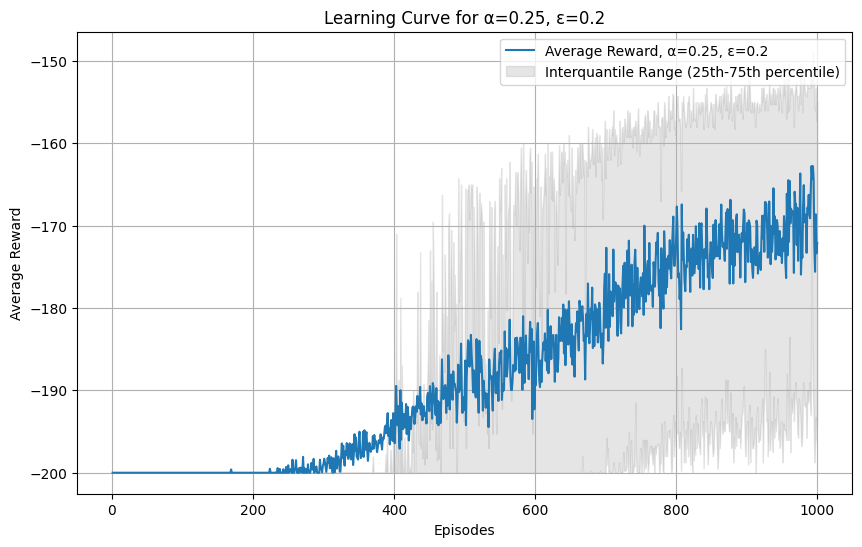

In [ ]:
alpha = 1/4
epsilon = .2

rewards1 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards1, alpha, epsilon)

Trial 1/50: Average Reward = -186.398
Trial 2/50: Average Reward = -186.533
Trial 3/50: Average Reward = -186.287
Trial 4/50: Average Reward = -185.831
Trial 5/50: Average Reward = -186.531
Trial 6/50: Average Reward = -187.31
Trial 7/50: Average Reward = -187.05
Trial 8/50: Average Reward = -187.184
Trial 9/50: Average Reward = -186.662
Trial 10/50: Average Reward = -186.392
Trial 11/50: Average Reward = -186.637
Trial 12/50: Average Reward = -186.668
Trial 13/50: Average Reward = -186.56
Trial 14/50: Average Reward = -186.25
Trial 15/50: Average Reward = -186.914
Trial 16/50: Average Reward = -186.768
Trial 17/50: Average Reward = -187.004
Trial 18/50: Average Reward = -185.953
Trial 19/50: Average Reward = -185.494
Trial 20/50: Average Reward = -187.197
Trial 21/50: Average Reward = -187.301
Trial 22/50: Average Reward = -186.538
Trial 23/50: Average Reward = -186.859
Trial 24/50: Average Reward = -188.124
Trial 25/50: Average Reward = -186.564
Trial 26/50: Average Reward = -187.478

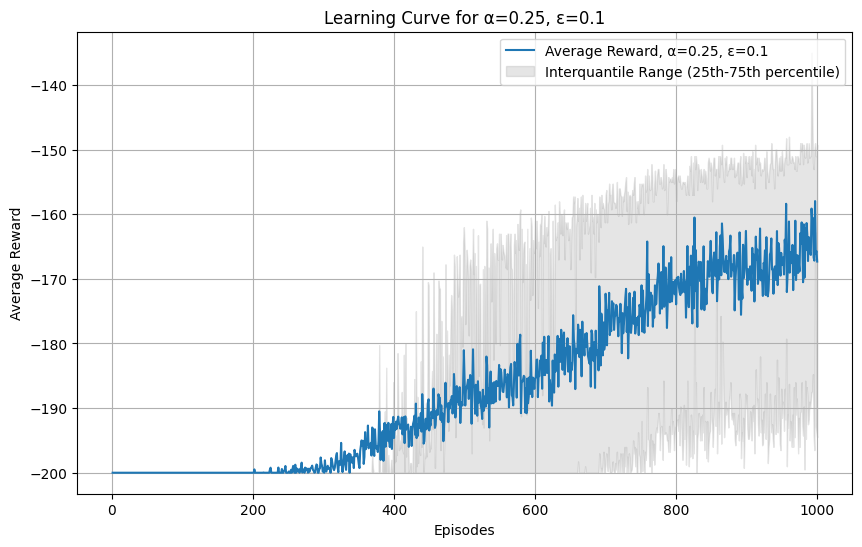

In [ ]:
alpha = 1/4
epsilon = .1

rewards2 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards2, alpha, epsilon)

Trial 1/50: Average Reward = -185.503
Trial 2/50: Average Reward = -183.869
Trial 3/50: Average Reward = -185.75
Trial 4/50: Average Reward = -184.966
Trial 5/50: Average Reward = -185.343
Trial 6/50: Average Reward = -186.315
Trial 7/50: Average Reward = -185.263
Trial 8/50: Average Reward = -185.532
Trial 9/50: Average Reward = -186.533
Trial 10/50: Average Reward = -185.262
Trial 11/50: Average Reward = -184.905
Trial 12/50: Average Reward = -186.149
Trial 13/50: Average Reward = -184.89
Trial 14/50: Average Reward = -185.754
Trial 15/50: Average Reward = -185.378
Trial 16/50: Average Reward = -186.023
Trial 17/50: Average Reward = -185.652
Trial 18/50: Average Reward = -185.513
Trial 19/50: Average Reward = -184.289
Trial 20/50: Average Reward = -184.707
Trial 21/50: Average Reward = -184.104
Trial 22/50: Average Reward = -185.381
Trial 23/50: Average Reward = -186.32
Trial 24/50: Average Reward = -186.257
Trial 25/50: Average Reward = -185.486
Trial 26/50: Average Reward = -185.21

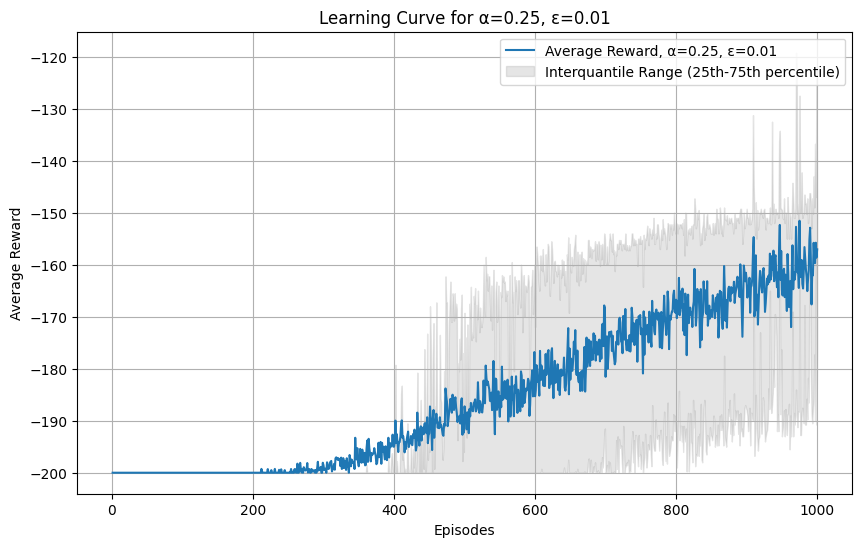

In [ ]:
alpha = 1/4
epsilon = .01

rewards3 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards3, alpha, epsilon)

Trial 1/50: Average Reward = -197.454
Trial 2/50: Average Reward = -197.118
Trial 3/50: Average Reward = -197.34
Trial 4/50: Average Reward = -197.474
Trial 5/50: Average Reward = -197.649
Trial 6/50: Average Reward = -197.287
Trial 7/50: Average Reward = -197.497
Trial 8/50: Average Reward = -196.708
Trial 9/50: Average Reward = -197.544
Trial 10/50: Average Reward = -196.842
Trial 11/50: Average Reward = -197.424
Trial 12/50: Average Reward = -197.653
Trial 13/50: Average Reward = -196.9
Trial 14/50: Average Reward = -197.217
Trial 15/50: Average Reward = -197.669
Trial 16/50: Average Reward = -197.766
Trial 17/50: Average Reward = -197.51
Trial 18/50: Average Reward = -197.044
Trial 19/50: Average Reward = -197.441
Trial 20/50: Average Reward = -197.749
Trial 21/50: Average Reward = -197.818
Trial 22/50: Average Reward = -197.394
Trial 23/50: Average Reward = -197.308
Trial 24/50: Average Reward = -198.16
Trial 25/50: Average Reward = -197.648
Trial 26/50: Average Reward = -197.411


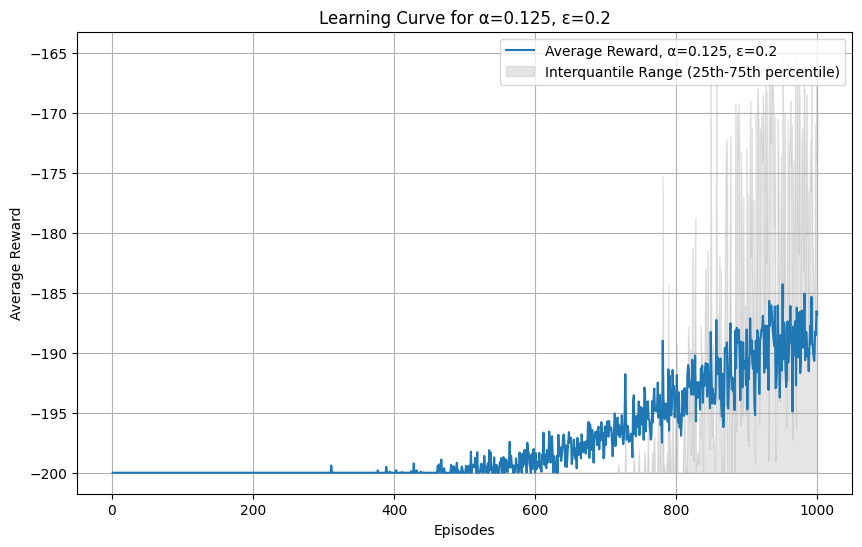

In [ ]:
alpha = 1/8
epsilon = .2

rewards4 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards4, alpha, epsilon)

Trial 1/50: Average Reward = -197.614
Trial 2/50: Average Reward = -196.693
Trial 3/50: Average Reward = -197.612
Trial 4/50: Average Reward = -197.621
Trial 5/50: Average Reward = -197.348
Trial 6/50: Average Reward = -197.917
Trial 7/50: Average Reward = -197.264
Trial 8/50: Average Reward = -197.733
Trial 9/50: Average Reward = -197.387
Trial 10/50: Average Reward = -197.508
Trial 11/50: Average Reward = -197.409
Trial 12/50: Average Reward = -197.034
Trial 13/50: Average Reward = -197.107
Trial 14/50: Average Reward = -197.458
Trial 15/50: Average Reward = -197.701
Trial 16/50: Average Reward = -197.136
Trial 17/50: Average Reward = -196.838
Trial 18/50: Average Reward = -197.465
Trial 19/50: Average Reward = -197.538
Trial 20/50: Average Reward = -197.355
Trial 21/50: Average Reward = -197.823
Trial 22/50: Average Reward = -197.646
Trial 23/50: Average Reward = -197.614
Trial 24/50: Average Reward = -197.714
Trial 25/50: Average Reward = -197.545
Trial 26/50: Average Reward = -197

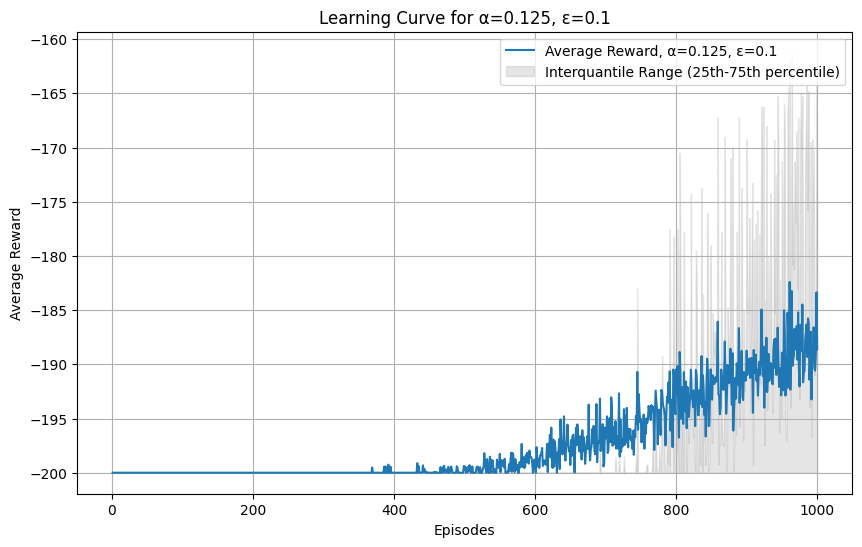

In [ ]:
alpha = 1/8
epsilon = .1

rewards5 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards5, alpha, epsilon)

Trial 1/50: Average Reward = -197.24
Trial 2/50: Average Reward = -196.86
Trial 3/50: Average Reward = -197.61
Trial 4/50: Average Reward = -196.615
Trial 5/50: Average Reward = -196.837
Trial 6/50: Average Reward = -197.436
Trial 7/50: Average Reward = -197.53
Trial 8/50: Average Reward = -197.719
Trial 9/50: Average Reward = -196.83
Trial 10/50: Average Reward = -197.929
Trial 11/50: Average Reward = -197.166
Trial 12/50: Average Reward = -197.62
Trial 13/50: Average Reward = -197.801
Trial 14/50: Average Reward = -197.268
Trial 15/50: Average Reward = -197.088
Trial 16/50: Average Reward = -197.71
Trial 17/50: Average Reward = -196.858
Trial 18/50: Average Reward = -196.735
Trial 19/50: Average Reward = -197.148
Trial 20/50: Average Reward = -197.333
Trial 21/50: Average Reward = -197.424
Trial 22/50: Average Reward = -196.365
Trial 23/50: Average Reward = -198.266
Trial 24/50: Average Reward = -197.917
Trial 25/50: Average Reward = -197.811
Trial 26/50: Average Reward = -197.277
Tr

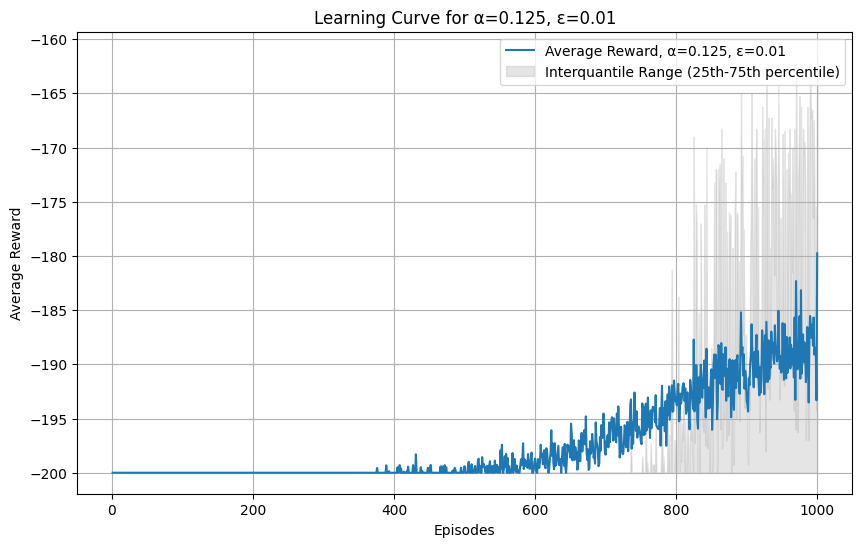

In [ ]:
alpha = 1/8
epsilon = .01

rewards6 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards6, alpha, epsilon)

Trial 1/50: Average Reward = -199.907
Trial 2/50: Average Reward = -200.0
Trial 3/50: Average Reward = -199.908
Trial 4/50: Average Reward = -199.978
Trial 5/50: Average Reward = -199.975
Trial 6/50: Average Reward = -199.903
Trial 7/50: Average Reward = -199.937
Trial 8/50: Average Reward = -200.0
Trial 9/50: Average Reward = -199.973
Trial 10/50: Average Reward = -199.967
Trial 11/50: Average Reward = -199.934
Trial 12/50: Average Reward = -199.966
Trial 13/50: Average Reward = -199.967
Trial 14/50: Average Reward = -199.958
Trial 15/50: Average Reward = -199.906
Trial 16/50: Average Reward = -199.964
Trial 17/50: Average Reward = -199.909
Trial 18/50: Average Reward = -200.0
Trial 19/50: Average Reward = -199.83
Trial 20/50: Average Reward = -199.933
Trial 21/50: Average Reward = -199.972
Trial 22/50: Average Reward = -199.905
Trial 23/50: Average Reward = -199.977
Trial 24/50: Average Reward = -199.976
Trial 25/50: Average Reward = -200.0
Trial 26/50: Average Reward = -199.952
Tria

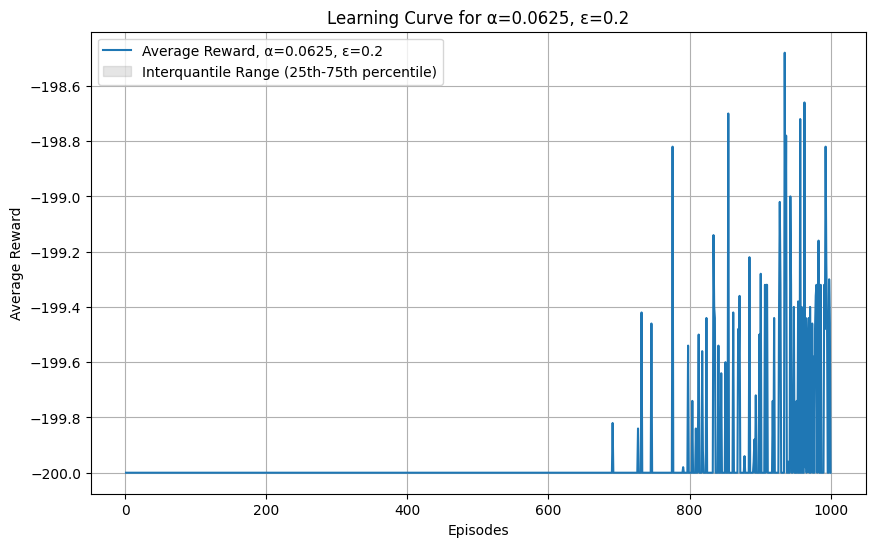

In [ ]:
alpha = 1/16
epsilon = .2

rewards7 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards7, alpha, epsilon)

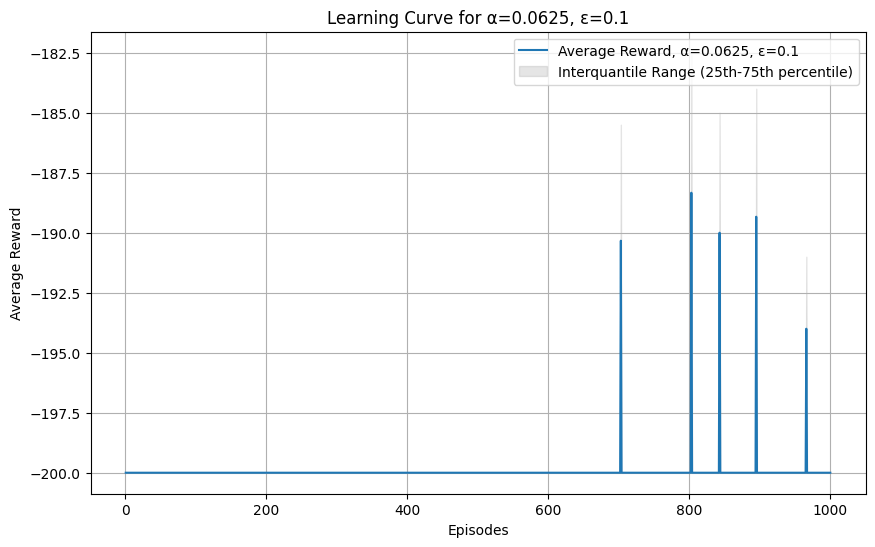

In [131]:
alpha = 1/16
epsilon = .1

rewards8 = train_agent(env, num_episodes, num_trials, alpha, epsilon)

plot_single_configuration(rewards8, alpha, epsilon)

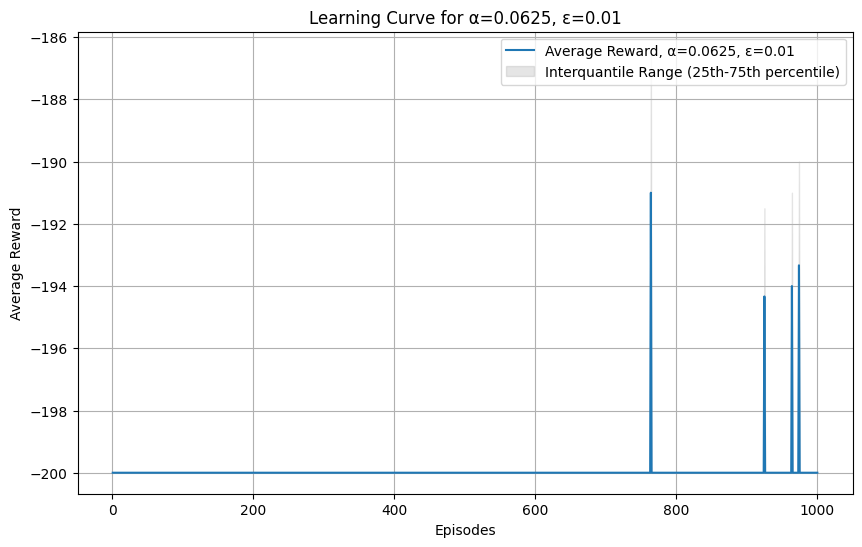

In [132]:
alpha = 1/16
epsilon = .01

rewards9 = train_agent(env, num_episodes, 3, alpha, epsilon)

plot_single_configuration(rewards9, alpha, epsilon)

Policy-based methods with linear function approximation [40 points]

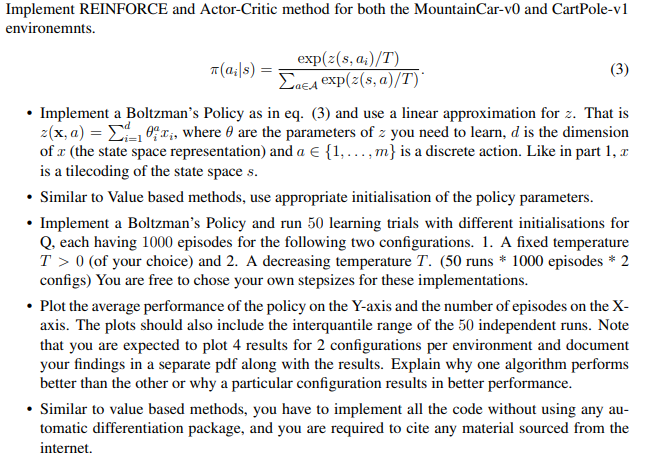

Actor Critique for Cartpole

In [ ]:
!pip install gym

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [97]:
class TileCoder:
    def __init__(self, environment, layer_count, tiles_per_layer):
        dimensions = environment.observation_space.shape[0]
        self.tiles_per_dimension = [tiles_per_layer] * dimensions
        self.tiling_dimensions = np.ceil(self.tiles_per_dimension).astype(int) + 1
        self.total_tiles = layer_count * np.prod(self.tiling_dimensions)

        self.upper_bounds = np.clip(environment.observation_space.high, a_min=None, a_max=10)
        self.lower_bounds = np.clip(environment.observation_space.low, a_min=-10, a_max=None)

        offsets_multiplier = (2 * np.arange(dimensions) + 1) / layer_count
        self.offsets = (np.outer(offsets_multiplier, np.arange(layer_count)) % 1).T

        self.layer_bases = np.prod(self.tiling_dimensions) * np.arange(layer_count)
        self.hash_map = np.cumprod([1] + list(self.tiling_dimensions))[:-1]

    def transform_state(self, state):
        normalized_state = (np.clip(state, self.lower_bounds, self.upper_bounds) - self.lower_bounds) / (self.upper_bounds - self.lower_bounds) * len(self.tiles_per_dimension)
        offset_normalized_state = (normalized_state + self.offsets).astype(int)
        return self.to_one_hot(self.layer_bases + np.dot(offset_normalized_state, self.hash_map))

    def to_one_hot(self, indices):
        vector = np.zeros(self.total_tiles)
        vector[indices] = 1
        return vector

In [ ]:

def reweighted_softmax(input_vector, temperature):
    adjusted_vector = (input_vector - np.max(input_vector)) / temperature
    softmax_vector = np.exp(adjusted_vector) / np.sum(np.exp(adjusted_vector))
    return softmax_vector


class ActorCritique:
    def __init__(self, environment, feature_mapper, learning_rate, discount_factor, temperature, adaptive_decay=False, decay_rate=0.997, min_temperature=0.05):
        self.environment = environment
        self.action_space = environment.action_space.n
        self.feature_mapper = feature_mapper
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.temperature = temperature
        self.adaptive_decay = adaptive_decay
        self.decay_rate = decay_rate
        self.minimum_temperature = min_temperature

        self.policy_parameters = np.random.uniform(-0.001, 0.001, (feature_mapper.total_tiles, self.action_space))
        self.value_function = np.random.uniform(-0.001, 0.001, (feature_mapper.total_tiles, 1))

    def choose_action(self, state):
        action_values = np.dot(self.policy_parameters.T, state)
        action_probabilities = reweighted_softmax(action_values, self.temperature)
        return np.random.choice(self.action_space, p=action_probabilities)

    def compute_gradient_log_policy(self, state, action):
        policy_probabilities = reweighted_softmax(np.dot(self.policy_parameters.T, state), self.temperature)
        gradient_matrix = -np.outer(state, policy_probabilities)
        gradient_matrix[:, action] += state
        return gradient_matrix

    def perform_update(self, current_state, action, reward, next_state, terminal):
        reward_target = reward if terminal else reward + self.discount_factor * np.dot(self.value_function.T, next_state)
        error = reward_target - np.dot(self.value_function.T, current_state)
        self.value_function += self.learning_rate * error * current_state[:, None]

        gradient_log_policy = self.compute_gradient_log_policy(current_state, action)
        self.policy_parameters += self.learning_rate * error * gradient_log_policy

    def adjust_temperature(self):
        if self.adaptive_decay:
            self.temperature = max(self.minimum_temperature, self.temperature * self.decay_rate)

    def train_episode(self):
        state = self.environment.reset()
        total_return = 0
        terminal = False

        while not terminal:
            state_transformed = self.feature_mapper.transform_state(state)
            action = self.choose_action(state_transformed)
            next_state, reward, terminal, _ = self.environment.step(action)
            self.perform_update(state_transformed, action, reward, self.feature_mapper.transform_state(next_state), terminal)
            state = next_state
            total_return += reward

        self.adjust_temperature()
        return total_return





In [ ]:
def plot_single_configuration(rewards, fixedTemp=True, alg="Actor Critique", temperature="Fixed"):
    avg_rewards = np.mean(rewards, axis=0)

    lower_quantile = np.quantile(rewards, 0.25, axis=0)
    upper_quantile = np.quantile(rewards, 0.75, axis=0)

    episodes = np.arange(1, len(avg_rewards) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(episodes, avg_rewards, label=f'Average Reward for {alg}, Temperature {temperature}')
    plt.fill_between(episodes, lower_quantile, upper_quantile, color='gray', alpha=0.2,
                     label='Interquantile Range (25th-75th percentile)')
    plt.title(f'Learning Curve for {alg}, Temperature {temperature} Over 50 Trials')
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.grid(True)
    plt.show()

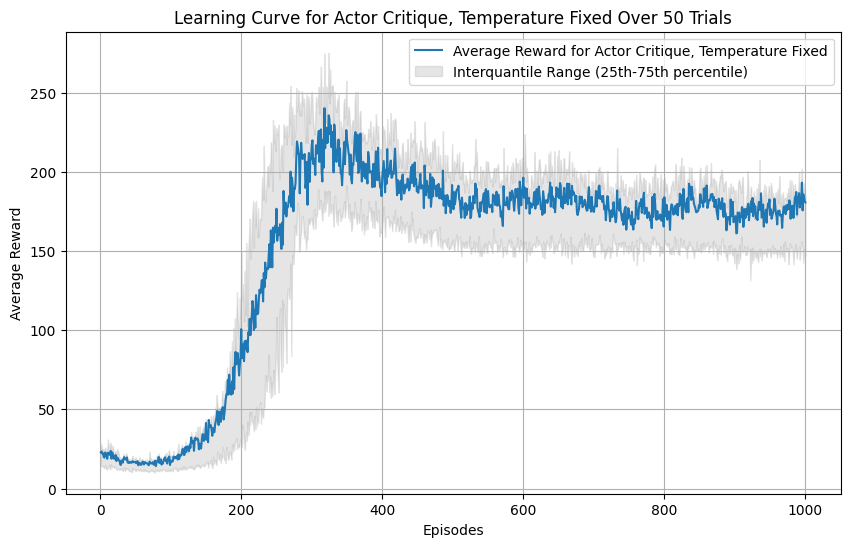

In [ ]:
environment = gym.make('CartPole-v1')


trial_rewards = []
for t in range(50):
  rewards = []
  tile_coder = TileCoder(environment, layer_count=3, tiles_per_layer=5)
  actor_critic = ActorCritique(environment, tile_coder, learning_rate=0.01, discount_factor=0.99, temperature=1.0, adaptive_decay=False, decay_rate=0.995, min_temperature=0.1)
  for i in range(1000):
    episode_return = actor_critic.train_episode()
    #if i % 10 == 0:
      #print(f"Episode Return: {episode_return}")
    rewards.append(episode_return)
  trial_rewards.append(rewards)

plot_single_configuration(trial_rewards)

finished trial 0
finished trial 1
finished trial 2
finished trial 3
finished trial 4
finished trial 5
finished trial 6
finished trial 7
finished trial 8
finished trial 9
finished trial 10
finished trial 11
finished trial 12
finished trial 13
finished trial 14
finished trial 15
finished trial 16
finished trial 17
finished trial 18
finished trial 19
finished trial 20
finished trial 21
finished trial 22
finished trial 23
finished trial 24
finished trial 25
finished trial 26
finished trial 27
finished trial 28
finished trial 29
finished trial 30
finished trial 31
finished trial 32
finished trial 33
finished trial 34
finished trial 35
finished trial 36
finished trial 37
finished trial 38
finished trial 39
finished trial 40
finished trial 41
finished trial 42
finished trial 43
finished trial 44
finished trial 45
finished trial 46
finished trial 47
finished trial 48
finished trial 49


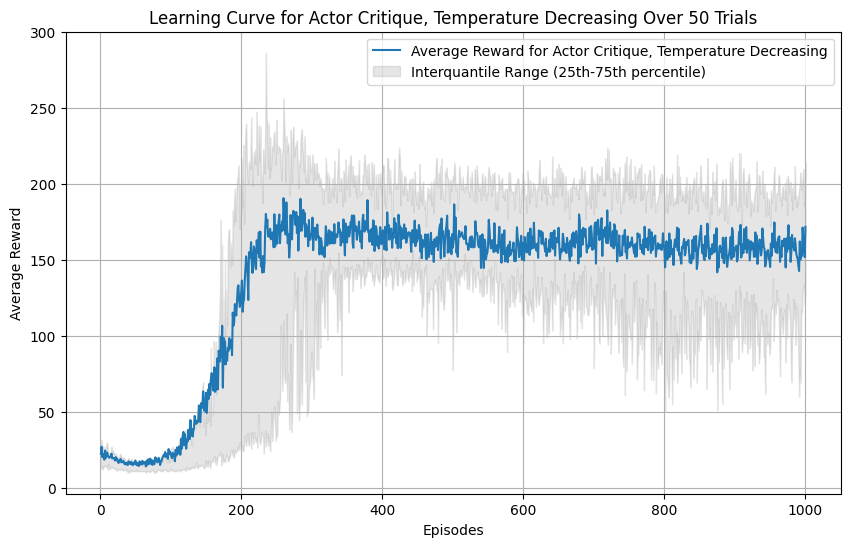

In [ ]:
environment = gym.make('CartPole-v1')


trial_rewards = []
for t in range(50):
  rewards = []
  tile_coder = TileCoder(environment, layer_count=3, tiles_per_layer=5)
  actor_critic = ActorCritique(environment, tile_coder, learning_rate=0.01, discount_factor=0.99, temperature=1.0, adaptive_decay=True, decay_rate=0.995, min_temperature=0.1)
  for i in range(1000):
    episode_return = actor_critic.train_episode()
    #if i % 10 == 0:
      #print(f"Episode Return: {episode_return}")
    rewards.append(episode_return)
  trial_rewards.append(rewards)
  print(f"finished trial {t}")

plot_single_configuration(trial_rewards, temperature="Decreasing")

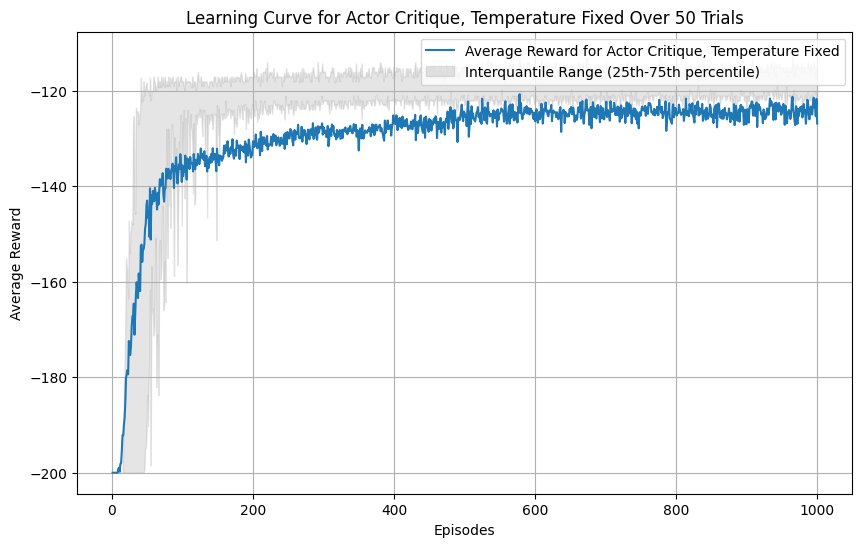

In [ ]:
environment = gym.make('MountainCar-v0')


trial_rewards = []
for t in range(50):
  rewards = []
  tile_coder = TileCoder(environment, layer_count=4, tiles_per_layer=8)
  actor_critic = ActorCritique(environment, tile_coder, learning_rate=0.01, discount_factor=0.99, temperature=1.0, adaptive_decay=False, decay_rate=0.995, min_temperature=0.1)
  for i in range(1000):
    episode_return = actor_critic.train_episode()
    #if i % 10 == 0:
      #print(f"Episode Return: {episode_return}")
    rewards.append(episode_return)
  trial_rewards.append(rewards)

plot_single_configuration(trial_rewards)

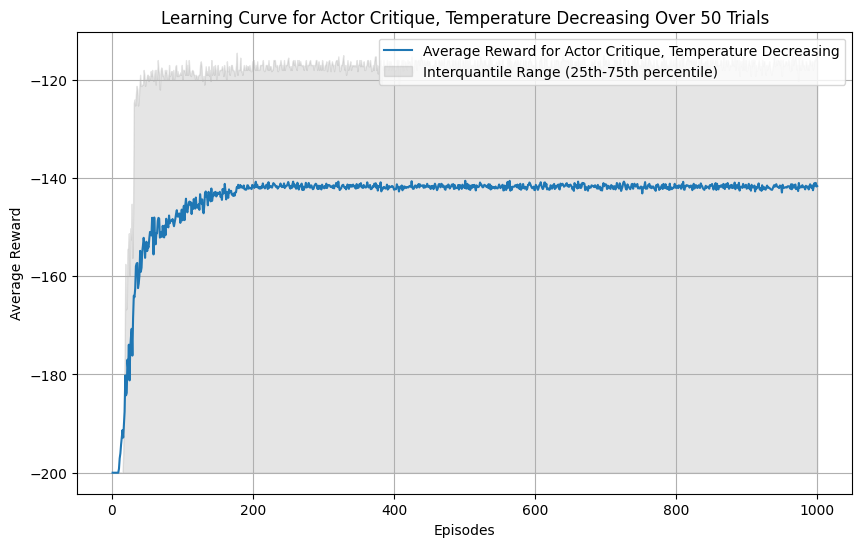

In [ ]:
environment = gym.make('MountainCar-v0')


trial_rewards = []
for t in range(50):
  rewards = []
  tile_coder = TileCoder(environment, layer_count=4, tiles_per_layer=8)
  actor_critic = ActorCritique(environment, tile_coder, learning_rate=0.01, discount_factor=0.99, temperature=1.0, adaptive_decay=True, decay_rate=0.995, min_temperature=0.1)
  for i in range(1000):
    episode_return = actor_critic.train_episode()
    #if i % 10 == 0:
      #print(f"Episode Return: {episode_return}")
    rewards.append(episode_return)
  trial_rewards.append(rewards)

plot_single_configuration(trial_rewards, temperature='Decreasing')

In [ ]:
!pip install gym

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [ ]:

class REINFORCE:
    def __init__(self, env, alpha, gamma, temperature=1.0, anneal_temperature=False, initial_temp=1.0, min_temp=0.1):
        self.env = env
        self.action_space = env.action_space.n
        self.state_space = env.observation_space.shape[0]
        self.weights = np.random.uniform(-0.001, 0.001, (self.state_space, self.action_space))
        self.alpha = alpha
        self.gamma = gamma
        self.temperature = initial_temp
        self.anneal_temperature = anneal_temperature
        self.min_temp = min_temp

    def softmax(self, preferences):
        temp_adjusted = preferences / self.temperature
        max_pref = np.max(temp_adjusted)
        exp_preferences = np.exp(temp_adjusted - max_pref)
        return exp_preferences / exp_preferences.sum()

    def action_probs(self, state):
        preferences = np.dot(state, self.weights)
        return self.softmax(preferences)

    def select_action(self, state):
        probs = self.action_probs(state)
        action = np.random.choice(self.action_space, p=probs)
        return action

    def compute_discounted_rewards(self, rewards):
        discounted_rewards = np.zeros(len(rewards))
        cumulative_rewards = 0
        for i in reversed(range(len(rewards))):
            cumulative_rewards = self.gamma * cumulative_rewards + rewards[i]
            discounted_rewards[i] = cumulative_rewards
        return discounted_rewards

    def update(self, states, actions, rewards):
        discounted_rewards = self.compute_discounted_rewards(rewards)
        for state, action, reward in zip(states, actions, discounted_rewards):
            probs = self.action_probs(state)
            d_log = -probs
            d_log[action] += 1
            self.weights[:, action] += self.alpha * state * d_log[action] * reward

    def train(self, episodes):
        total_rewards = []
        for episode in range(episodes):
            states, actions, rewards = [], [], []
            state = self.env.reset()
            done = False
            while not done:
                action = self.select_action(state)
                next_state, reward, done, _ = self.env.step(action)
                states.append(state)
                actions.append(action)
                rewards.append(reward)
                state = next_state
            self.update(states, actions, rewards)
            total_rewards.append(sum(rewards))
            if self.anneal_temperature:
                self.temperature = max(self.min_temp, self.temperature * 0.99)
        return total_rewards

GLOBAL_SEED = 1
np.random.seed(GLOBAL_SEED)

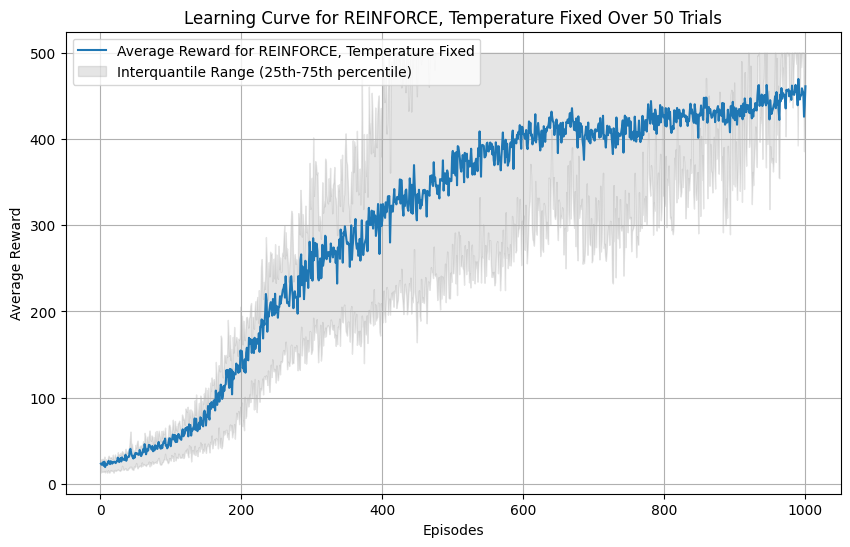

In [ ]:

env = gym.make('CartPole-v1')
trial_rewards = []
for t in range(50):
    agent = REINFORCE(env, 0.001, 0.99, temperature=5, anneal_temperature=False)
    episode_rewards = agent.train(1000)
    trial_rewards.append(episode_rewards)
plot_single_configuration(trial_rewards, fixedTemp=True, alg="REINFORCE", temperature="Fixed")

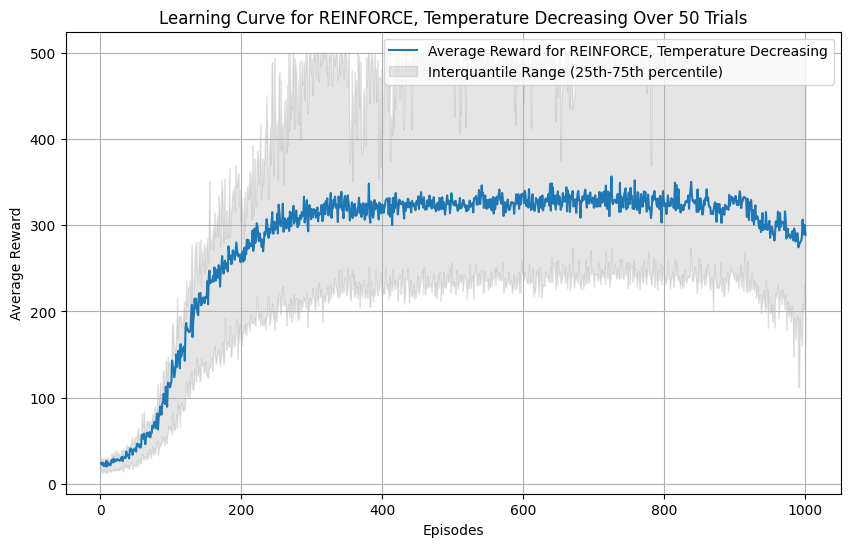

In [ ]:
env = gym.make('CartPole-v1')
trial_rewards = []
for t in range(50):
    agent = REINFORCE(env, 0.001, 0.99, temperature=5, anneal_temperature=True)
    episode_rewards = agent.train(1000)
    trial_rewards.append(episode_rewards)
plot_single_configuration(trial_rewards, fixedTemp=False, alg="REINFORCE", temperature="Decreasing")

In [109]:
import numpy as np
import gym

class REINFORCE: #this one's for mountaincar
    def __init__(self, env, alpha, gamma, temp=1.0, temp_decay=0.99, min_temp=0.1, use_tile_coder=False, tilecoder=None):
        self.action_space = env.action_space.n
        self.state_space = env.observation_space.shape[0]
        self.use_tile_coder = use_tile_coder
        self.tilecoder = tilecoder

        if use_tile_coder and tilecoder is not None:
            self.feature_dim = tilecoder.total_tiles
        else:
            self.feature_dim = self.state_space

        self.z = np.random.rand(self.feature_dim, self.action_space)
        self.alpha = alpha
        self.gamma = gamma
        self.temp = temp
        self.temp_decay = temp_decay
        self.min_temp = min_temp

    def softmax(self, y):
        e_y = np.exp((y - np.max(y)) / self.temp)
        return e_y / e_y.sum()

    def action_probs(self, state):
        if self.use_tile_coder and self.tilecoder is not None:
            state = self.tilecoder.transform_state(state)
        y = np.dot(state, self.z)
        return self.softmax(y)

    def select_action(self, state):
        probs = self.action_probs(state)
        action = np.random.choice(self.action_space, p=probs)
        return action

    def grad_log_p(self, state, action):
        probs = self.action_probs(state)
        grad_log_p = -probs
        grad_log_p[action] += 1
        return grad_log_p

    def update(self, rewards, obs, actions):
        discounted_rewards = self.discount_rewards(rewards)
        for ob, action, reward in zip(obs, actions, discounted_rewards):
            grad_log_p = self.grad_log_p(ob, action)
            if self.use_tile_coder and self.tilecoder is not None:
                ob = self.tilecoder.transform_state(ob)
            self.z += self.alpha * np.outer(ob, grad_log_p) * reward
        self.temp = max(self.temp * self.temp_decay, self.min_temp)

    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros(len(rewards))
        cumulative_rewards = 0
        for i in reversed(range(len(rewards))):
            cumulative_rewards = self.gamma * cumulative_rewards + rewards[i]
            discounted_rewards[i] = cumulative_rewards
        return discounted_rewards

    def train(self, env, episodes, max_steps_per_episode=700):
        total_rewards = []
        for episode in range(episodes):
            episode_states = []
            episode_actions = []
            episode_rewards = []
            state = env.reset()
            done = False
            for step in range(max_steps_per_episode):
                action = self.select_action(state)
                next_state, reward, done, _ = env.step(action)
                episode_states.append(state)
                episode_actions.append(action)
                episode_rewards.append(reward)
                state = next_state
                if done:
                    break
            self.update(episode_rewards, episode_states, episode_actions)
            total_rewards.append(sum(episode_rewards))
        return total_rewards


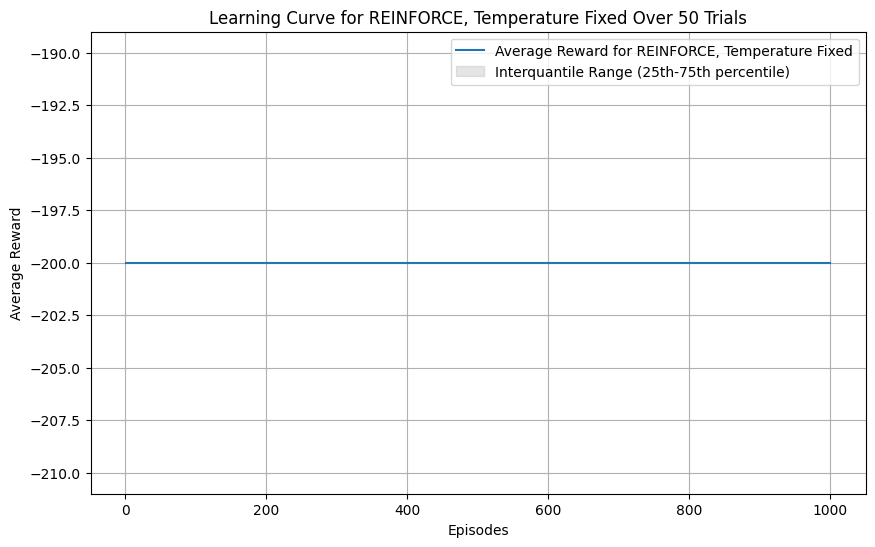

In [113]:

env = gym.make('MountainCar-v0')
trial_rewards = []
for t in range(50):
    tilecoder = TileCoder(env, layer_count=8, tiles_per_layer=8)
    agent = REINFORCE(env, 0.001, 0.99, use_tile_coder=True, tilecoder=tilecoder)
    episode_rewards = agent.train(env, 7000)
    trial_rewards.append(episode_rewards)
plot_single_configuration(trial_rewards, fixedTemp=True, alg="REINFORCE", temperature="Fixed")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


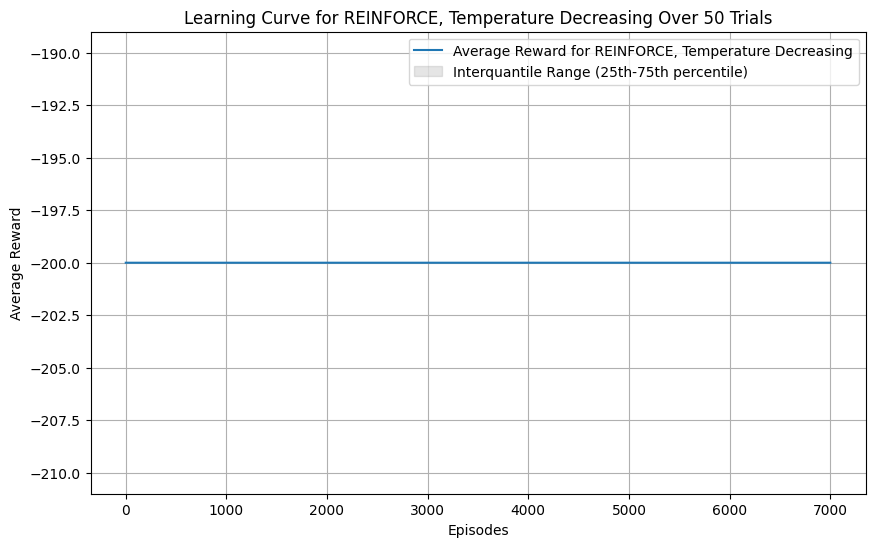

In [114]:

env = gym.make('MountainCar-v0')
trial_rewards = []
for t in range(50):
    tilecoder = TileCoder(env, layer_count=8, tiles_per_layer=8)
    agent = REINFORCE(env, 0.001, 0.99, use_tile_coder=True, tilecoder=tilecoder, temp=10, temp_decay=0.99, min_temp=0.1)
    episode_rewards = agent.train(env, 7000)
    trial_rewards.append(episode_rewards)
plot_single_configuration(trial_rewards, fixedTemp=False, alg="REINFORCE", temperature="Decreasing")